# Car Price Predicition Project:
                
  With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model.

In [1]:
# importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data into jupyter notebook
df=pd.read_excel('usedcardata.xlsx')
df

Unnamed: 0     Brand ModelName                          Model  \
0              0   Hyundai    Santro                     Sportz CNG   
1              1   Hyundai     Elite                      Magna 1.2   
2              2    Toyota     Etios   2013-2014 G Xclusive Edition   
3              3   Hyundai       I10  1.1L iRDE ERA Special Edition   
4              4  Mahindra    Xuv500               2011-2015 W8 4WD   
...          ...       ...       ...                            ...   
4616        4616    Maruti      Ritz                            LDi   
4617        4617    Maruti  Alto 800                            LXI   
4618        4618    Maruti     Swift                            VDI   
4619        4619      Tata     Tiago                       XZA Plus   
4620        4620  Mahindra   Kuv 100            mFALCON G80 K6 Plus   

        Variant      Fuel type  Kilometer      Owner  \
0        MANUAL  CNG & HYBRIDS   62557 km        1st   
1        MANUAL         PETROL   52000 km        1st   
2        MANUAL         PETROL   33000 km        1st   
3        MANUAL            CNG   70000 km     Second   
4        MANUAL         DIESEL   90000 km     Second   
...         ...            ...        ...        ...   
4616     Manual         Diesel  73911 kms  2nd Owner   
4617     Manual         Petrol  19864 kms  1st Owner   
4618     Manual         Diesel  58569 kms  1st Owner   
4619  Automatic         Petrol  15346 kms  1st Owner   
4620     Manual         Petrol  24505 kms  1st Owner   

                                               Location  Year mn_year   Price  
0                               Rohini Sector 10, Delhi  2018     NaN  576800  
1                           New Rajdhani Enclave, Delhi  2015    I20   489999  
2                                      Vikaspuri, Delhi  2014   Liva   335000  
3                                       Bharthal, Delhi  2009     NaN  115000  
4                                      Daryaganj, Delhi  2011     NaN  500000  
...                                                 ...   ...     ...     ...  
4616  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2016     NaN  286500  
4617  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2018     NaN  284500  
4618  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2012     NaN  359000  
4619  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2019     NaN  572500  
4620  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2017     NaN  438000  

[4621 rows x 12 columns]

In [3]:
# scraping top 10 rows present in the dataset
df.head(10)

Unnamed: 0     Brand ModelName                          Model    Variant  \
0           0   Hyundai    Santro                     Sportz CNG     MANUAL   
1           1   Hyundai     Elite                      Magna 1.2     MANUAL   
2           2    Toyota     Etios   2013-2014 G Xclusive Edition     MANUAL   
3           3   Hyundai       I10  1.1L iRDE ERA Special Edition     MANUAL   
4           4  Mahindra    Xuv500               2011-2015 W8 4WD     MANUAL   
5           5    Maruti    Suzuki                            LXI  AUTOMATIC   
6           6      Tata    Others                            NaN     MANUAL   
7           7   Hyundai     Grand           Magna 1.2 Kappa VTVT     MANUAL   
8           8  Mahindra    Bolero                            ZLX     MANUAL   
9           9    Maruti    Suzuki                            LXI     MANUAL   

       Fuel type Kilometer   Owner                     Location  Year  \
0  CNG & HYBRIDS  62557 km     1st      Rohini Sector 10, Delhi  2018   
1         PETROL  52000 km     1st  New Rajdhani Enclave, Delhi  2015   
2         PETROL  33000 km     1st             Vikaspuri, Delhi  2014   
3            CNG  70000 km  Second              Bharthal, Delhi  2009   
4         DIESEL  90000 km  Second             Daryaganj, Delhi  2011   
5  CNG & HYBRIDS  70000 km     1st           Vinod Nagar, Delhi  2010   
6  CNG & HYBRIDS  46000 km     1st                Ashram, Delhi  2018   
7         PETROL  21000 km     1st           Preet Vihar, Delhi  2020   
8         DIESEL  56085 km     1st           Ashok Vihar, Delhi  2013   
9  CNG & HYBRIDS  51235 km     1st              Badarpur, Delhi  2019   

     mn_year   Price  
0        NaN  576800  
1       I20   489999  
2      Liva   335000  
3        NaN  115000  
4        NaN  500000  
5   Wagon R    90000  
6        NaN  380000  
7  I10 Nios   625000  
8        NaN  425000  
9   Wagon R   565000

In [4]:
# Scraping data of last 10 rows present in the dataset
df.tail(10)

Unnamed: 0     Brand  ModelName                         Model  \
4611        4611   Hyundai  Grand I10                    CRDi Magna   
4612        4612      Ford   Ecosport  1.5 DV5 MT Titanium Optional   
4613        4613     Honda      Amaze                     S i-Dtech   
4614        4614   Renault       Kwid                           AMT   
4615        4615     Skoda      Rapid      1.6 MPI AT Ambition BSIV   
4616        4616    Maruti       Ritz                           LDi   
4617        4617    Maruti   Alto 800                           LXI   
4618        4618    Maruti      Swift                           VDI   
4619        4619      Tata      Tiago                      XZA Plus   
4620        4620  Mahindra    Kuv 100           mFALCON G80 K6 Plus   

        Variant Fuel type   Kilometer      Owner  \
4611     Manual    Diesel   74159 kms  1st Owner   
4612     Manual    Diesel  131919 kms  1st Owner   
4613     Manual    Diesel   55411 kms  1st Owner   
4614  Automatic    Petrol   21187 kms  1st Owner   
4615  Automatic    Petrol   30984 kms  1st Owner   
4616     Manual    Diesel   73911 kms  2nd Owner   
4617     Manual    Petrol   19864 kms  1st Owner   
4618     Manual    Diesel   58569 kms  1st Owner   
4619  Automatic    Petrol   15346 kms  1st Owner   
4620     Manual    Petrol   24505 kms  1st Owner   

                                               Location  Year mn_year   Price  
4611  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2013     NaN  341000  
4612  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2015     NaN  520000  
4613  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2016     NaN  500000  
4614  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2018     NaN  419500  
4615  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2020     NaN  865000  
4616  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2016     NaN  286500  
4617  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2018     NaN  284500  
4618  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2012     NaN  359000  
4619  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2019     NaN  572500  
4620  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2017     NaN  438000

# EDA(Exploratory Data Analysis):

In [5]:
# Lets check the shape of the dataset
df.shape

(4621, 12)

* Here we can see that there are 4621 rows present in 12 columns.

In [6]:
# Lets check the information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4621 entries, 0 to 4620
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4621 non-null   int64 
 1   Brand       4621 non-null   object
 2   ModelName   4621 non-null   object
 3   Model       4577 non-null   object
 4   Variant     4621 non-null   object
 5   Fuel type   4621 non-null   object
 6   Kilometer   4621 non-null   object
 7   Owner       4621 non-null   object
 8   Location    4621 non-null   object
 9   Year        4621 non-null   int64 
 10  mn_year     822 non-null    object
 11  Price       4621 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 433.3+ KB


* Here we can see that there are few null values present in the column Model.
* Here we can also see a column named mn_year which is having 57% of the null data.

In [7]:
# lets check the names of the columns present in the dataset
df.columns

Index(['Unnamed: 0', 'Brand', 'ModelName', 'Model', 'Variant', 'Fuel type',
       'Kilometer', 'Owner', 'Location', 'Year', 'mn_year', 'Price'],
      dtype='object')

* Here we can see that there is a column named "Unnamed: 0" which is having row no.'s which is not required for our project and moreover index no. are present by default in python, so we can drop this column.'

In [8]:
# lets check the presence of null values in the dataset
df.isnull().sum()

Unnamed: 0       0
Brand            0
ModelName        0
Model           44
Variant          0
Fuel type        0
Kilometer        0
Owner            0
Location         0
Year             0
mn_year       3799
Price            0
dtype: int64

* Here we are sure once again that there are null values present in columns Model and mn_year, which we need to handle.

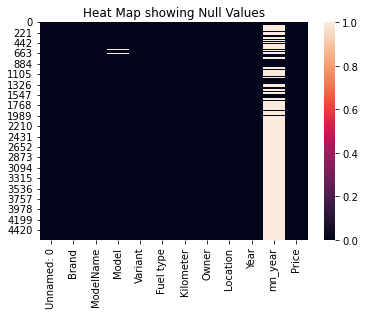

In [9]:
# Lets visualize and verify once more presence of null values or not with the help of heatmap
sns.heatmap(df.isnull())
plt.title("Heat Map showing Null Values")
plt.show()

* Here with the help of heatmap as well we can see that there are some null values present in the Column Model and more than half of null data present in the column mn_year.

In [10]:
# lets check the datatype of each column present in the dataset
df.dtypes

Unnamed: 0     int64
Brand         object
ModelName     object
Model         object
Variant       object
Fuel type     object
Kilometer     object
Owner         object
Location      object
Year           int64
mn_year       object
Price          int64
dtype: object

* Here we can clearly see, that all the columns present in the dataset are having object datatype.

In [11]:
# Now lets check the presence of unique values present in each column
df.nunique()

Unnamed: 0    4621
Brand           32
ModelName      206
Model         1285
Variant          5
Fuel type       10
Kilometer     2260
Owner           13
Location       597
Year            25
mn_year         81
Price         1226
dtype: int64

* Here we can see the first column Unnamed: 0 is having all the unique values, which we already observed.so, we will drop this column.

In [12]:
# lets drop the columns which are not required for working of this model.
df.drop('Unnamed: 0',axis=1,inplace=True)

* Here we have successfully dropped the column which was not required for our model building.

In [13]:
# now lets check the value counts in all the columns of the dataset
for i in df.columns:
    print(df[i].value_counts())
    print('------------------------------------------')

Maruti           1771
Hyundai          1102
Honda             436
Toyota            192
Mahindra          188
Renault           155
Volkswagen        141
Tata              130
Ford              108
Mercedes-Benz      61
Skoda              54
Bmw                54
Audi               37
Chevrolet          37
Nissan             35
Datsun             27
Jeep               18
Fiat               12
Kia                12
Jaguar              9
Mercedes            7
Land                6
Mg                  5
Other               4
Mitsubishi          4
Volvo               3
Bajaj               3
Porsche             3
Ssangyong           2
Isuzu               2
Ambassador          2
Mini                1
Name: Brand, dtype: int64
------------------------------------------
Suzuki     513
I20        304
Swift      218
Wagon R    205
City       170
          ... 
Willys       1
Quanto       1
Tavera       1
Montero      1
Omni         1
Name: ModelName, Length: 206, dtype: int64
-------------------

* in column Variant we can see that there are 2 Manual columns and 2 Automatic column we need to merge then into 1 Manual and 1 Automatic columns.
* Same problem is there in fuel type column. Here also due to upper case and lower case, here also we will merge data in columns, petrol, diesel and cng & Hybrids.
* In column kilometer we will clean the data and drop km and kms from 
* In Column Owner, we can see there are 3 columns for 1st owner, same for 2nd owner,3rd owner and fourth owner.
* in column location instead of big address we will replace it by only city name.

In [14]:
df["Variant"]=df["Variant"].replace("MANUAL","Manual").replace("AUTOMATIC","Automatic")

In [15]:
df["Variant"].value_counts()

Manual       3785
Automatic     792
--             44
Name: Variant, dtype: int64

In [16]:
df["Fuel type"]=df["Fuel type"].replace("PETROL","Petrol")

In [17]:
df["Fuel type"].value_counts()

Petrol                           3012
DIESEL                            857
Diesel                            571
CNG & HYBRIDS                      89
CNG                                66
--                                 17
LPG                                 5
ELECTRIC                            3
PETROL/COMPRESSED NATURAL GAS       1
Name: Fuel type, dtype: int64

In [18]:
df["Fuel type"]=df["Fuel type"].replace("DIESEL","Diesel").replace("CNG","CNG & HYBRIDS")

In [19]:
df[['Kilometer','kms']]=pd.DataFrame(df.Kilometer.str.split(' ',1).tolist(),columns=['Kilometer','kms'])
df

Brand ModelName                          Model    Variant  \
0      Hyundai    Santro                     Sportz CNG     Manual   
1      Hyundai     Elite                      Magna 1.2     Manual   
2       Toyota     Etios   2013-2014 G Xclusive Edition     Manual   
3      Hyundai       I10  1.1L iRDE ERA Special Edition     Manual   
4     Mahindra    Xuv500               2011-2015 W8 4WD     Manual   
...        ...       ...                            ...        ...   
4616    Maruti      Ritz                            LDi     Manual   
4617    Maruti  Alto 800                            LXI     Manual   
4618    Maruti     Swift                            VDI     Manual   
4619      Tata     Tiago                       XZA Plus  Automatic   
4620  Mahindra   Kuv 100            mFALCON G80 K6 Plus     Manual   

          Fuel type Kilometer      Owner  \
0     CNG & HYBRIDS     62557        1st   
1            Petrol     52000        1st   
2            Petrol     33000        1st   
3     CNG & HYBRIDS     70000     Second   
4            Diesel     90000     Second   
...             ...       ...        ...   
4616         Diesel     73911  2nd Owner   
4617         Petrol     19864  1st Owner   
4618         Diesel     58569  1st Owner   
4619         Petrol     15346  1st Owner   
4620         Petrol     24505  1st Owner   

                                               Location  Year mn_year   Price  \
0                               Rohini Sector 10, Delhi  2018     NaN  576800   
1                           New Rajdhani Enclave, Delhi  2015    I20   489999   
2                                      Vikaspuri, Delhi  2014   Liva   335000   
3                                       Bharthal, Delhi  2009     NaN  115000   
4                                      Daryaganj, Delhi  2011     NaN  500000   
...                                                 ...   ...     ...     ...   
4616  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2016     NaN  286500   
4617  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2018     NaN  284500   
4618  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2012     NaN  359000   
4619  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2019     NaN  572500   
4620  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2017     NaN  438000   

      kms  
0      km  
1      km  
2      km  
3      km  
4      km  
...   ...  
4616  kms  
4617  kms  
4618  kms  
4619  kms  
4620  kms  

[4621 rows x 12 columns]

In [20]:
df.drop("kms",axis=1,inplace=True)
df

Brand ModelName                          Model    Variant  \
0      Hyundai    Santro                     Sportz CNG     Manual   
1      Hyundai     Elite                      Magna 1.2     Manual   
2       Toyota     Etios   2013-2014 G Xclusive Edition     Manual   
3      Hyundai       I10  1.1L iRDE ERA Special Edition     Manual   
4     Mahindra    Xuv500               2011-2015 W8 4WD     Manual   
...        ...       ...                            ...        ...   
4616    Maruti      Ritz                            LDi     Manual   
4617    Maruti  Alto 800                            LXI     Manual   
4618    Maruti     Swift                            VDI     Manual   
4619      Tata     Tiago                       XZA Plus  Automatic   
4620  Mahindra   Kuv 100            mFALCON G80 K6 Plus     Manual   

          Fuel type Kilometer      Owner  \
0     CNG & HYBRIDS     62557        1st   
1            Petrol     52000        1st   
2            Petrol     33000        1st   
3     CNG & HYBRIDS     70000     Second   
4            Diesel     90000     Second   
...             ...       ...        ...   
4616         Diesel     73911  2nd Owner   
4617         Petrol     19864  1st Owner   
4618         Diesel     58569  1st Owner   
4619         Petrol     15346  1st Owner   
4620         Petrol     24505  1st Owner   

                                               Location  Year mn_year   Price  
0                               Rohini Sector 10, Delhi  2018     NaN  576800  
1                           New Rajdhani Enclave, Delhi  2015    I20   489999  
2                                      Vikaspuri, Delhi  2014   Liva   335000  
3                                       Bharthal, Delhi  2009     NaN  115000  
4                                      Daryaganj, Delhi  2011     NaN  500000  
...                                                 ...   ...     ...     ...  
4616  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2016     NaN  286500  
4617  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2018     NaN  284500  
4618  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2012     NaN  359000  
4619  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2019     NaN  572500  
4620  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  2017     NaN  438000  

[4621 rows x 11 columns]

In [21]:
df["Owner"]=df["Owner"].replace("1st",1).replace("1st Owner",1).replace("First",1)

In [22]:
df["Owner"]=df["Owner"].replace("2nd",2).replace("2nd Owner",2).replace("Second",2).replace("3rd",3).replace("3rd Owner",3).replace("Third",3)

In [23]:
df["Owner"]=df["Owner"].replace("4th",4).replace("Fourth",4).replace("4+",5).replace("--",1)

In [24]:
df["Owner"].value_counts()

1    3696
2     833
3      79
4      10
5       3
Name: Owner, dtype: int64

In [25]:
df["Location"].value_counts().index

Index(['MCGM Parking Lodha Fiorenza Ground Floor Adjacent Hub Mall Goregaon East, Mumbai|',
       'MCGM Parking The Address Wadhwa Ground Floor Opp R-City Mall Ghatkoper West, Mumbai|',
       'Khasra No-305,Dera More Fatehpur Beri,Near CNG Pump, Delhi',
       'Sri Shivananda Stores HSR Layout BookMyCrackers Mangammanapalya Main Road ITI Layout Hosapalaya HSR Layout, Bengaluru',
       'Serve No 40/AA 48/AA 49/AA Attapur To Nandimusliaguda Link Road Bharat Nagar Colony|Backside Attapur, Hyderabad',
       'Behind Botanical Garden Metro Station  Multilevel Parking 1st Floor  Sec 37 , Noida',
       'Garuda Mall Magrath Rd Ashok Nagar, Bengaluru',
       'Ghitorni Metro Station Parking|, Delhi',
       'ILD Trade Centre GF 11 Sohna Rd, Sector 47, Gurugram',
       'Shop No.1LGF EDM Mall Kaushambi|',
       ...
       'Param Puri, Delhi', 'Bhagwati Garden, Delhi',
       'Dwarka Sector 18A, Delhi', 'Lado Sarai, Delhi', 'Haidarpur, Delhi',
       'Subhash Nagar, Delhi', 'Chandan Hola, De

In [26]:
df[['address','Location']]=pd.DataFrame(df.Location.str.split(', ',1).tolist(),columns=['address','Location'])
df

Brand ModelName                          Model    Variant  \
0      Hyundai    Santro                     Sportz CNG     Manual   
1      Hyundai     Elite                      Magna 1.2     Manual   
2       Toyota     Etios   2013-2014 G Xclusive Edition     Manual   
3      Hyundai       I10  1.1L iRDE ERA Special Edition     Manual   
4     Mahindra    Xuv500               2011-2015 W8 4WD     Manual   
...        ...       ...                            ...        ...   
4616    Maruti      Ritz                            LDi     Manual   
4617    Maruti  Alto 800                            LXI     Manual   
4618    Maruti     Swift                            VDI     Manual   
4619      Tata     Tiago                       XZA Plus  Automatic   
4620  Mahindra   Kuv 100            mFALCON G80 K6 Plus     Manual   

          Fuel type Kilometer  Owner   Location  Year mn_year   Price  \
0     CNG & HYBRIDS     62557      1      Delhi  2018     NaN  576800   
1            Petrol     52000      1      Delhi  2015    I20   489999   
2            Petrol     33000      1      Delhi  2014   Liva   335000   
3     CNG & HYBRIDS     70000      2      Delhi  2009     NaN  115000   
4            Diesel     90000      2      Delhi  2011     NaN  500000   
...             ...       ...    ...        ...   ...     ...     ...   
4616         Diesel     73911      2  Hyderabad  2016     NaN  286500   
4617         Petrol     19864      1  Hyderabad  2018     NaN  284500   
4618         Diesel     58569      1  Hyderabad  2012     NaN  359000   
4619         Petrol     15346      1  Hyderabad  2019     NaN  572500   
4620         Petrol     24505      1  Hyderabad  2017     NaN  438000   

                                                address  
0                                      Rohini Sector 10  
1                                  New Rajdhani Enclave  
2                                             Vikaspuri  
3                                              Bharthal  
4                                             Daryaganj  
...                                                 ...  
4616  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  
4617  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  
4618  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  
4619  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  
4620  Serve No 40/AA 48/AA 49/AA Attapur To Nandimus...  

[4621 rows x 12 columns]

In [27]:
df.head(50)

Brand  ModelName                          Model    Variant  \
0         Hyundai     Santro                     Sportz CNG     Manual   
1         Hyundai      Elite                      Magna 1.2     Manual   
2          Toyota      Etios   2013-2014 G Xclusive Edition     Manual   
3         Hyundai        I10  1.1L iRDE ERA Special Edition     Manual   
4        Mahindra     Xuv500               2011-2015 W8 4WD     Manual   
5          Maruti     Suzuki                            LXI  Automatic   
6            Tata     Others                            NaN     Manual   
7         Hyundai      Grand           Magna 1.2 Kappa VTVT     Manual   
8        Mahindra     Bolero                            ZLX     Manual   
9          Maruti     Suzuki                            LXI     Manual   
10         Maruti     Suzuki                      1.3 Alpha     Manual   
11         Maruti     Suzuki                            LXI     Manual   
12        Renault     Duster           110PS Diesel RxZ AWD     Manual   
13         Maruti     Suzuki                        AMT VDI  Automatic   
14         Maruti     Suzuki                    LX Optional     Manual   
15       Mahindra     Xuv500                         W8 2WD     Manual   
16          Honda      Amaze                 1.5 SMT I DTEC     Manual   
17          Honda       City             2008-2011 1.5 S MT     Manual   
18  Mercedes-Benz          B                       B180 CDI  Automatic   
19       Mahindra    Scorpio                        S6 Plus     Manual   
20        Hyundai     Santro               GLS II - Euro II     Manual   
21         Maruti     Suzuki                            VDi     Manual   
22        Hyundai        I10                    Era 1.1 LPG     Manual   
23        Hyundai    Elantra                2012-2015 SX AT  Automatic   
24         Maruti     Suzuki                 LXI Optional-O     Manual   
25        Hyundai        I10                          Magna     Manual   
26         Maruti     Suzuki                 LXI Optional-O     Manual   
27        Hyundai    Fluidic                    1.6 VTVT SX     Manual   
28         Jaguar     F-Pace                       Prestige  Automatic   
29         Maruti     Suzuki                            VDI     Manual   
30          Skoda     Superb  2008-2013 Elegance 1.8 TSI AT  Automatic   
31        Hyundai        I10               1.2 Kappa SPORTZ     Manual   
32         Maruti     Suzuki                            VXI     Manual   
33         Maruti     Suzuki                            VXi     Manual   
34        Hyundai     Santro                        GLS CNG     Manual   
35         Maruti     Suzuki                            LXI     Manual   
36        Hyundai     Santro                         Others     Manual   
37          Honda      Amaze                       S Petrol     Manual   
38         Maruti     Suzuki                            LXI     Manual   
39        Renault     Duster      2012-2015 85PS Diesel RxL     Manual   
40        Hyundai     Santro                            Era     Manual   
41         Toyota    Corolla                         1.8 GL     Manual   
42         Maruti     Suzuki                        LXI CNG     Manual   
43        Hyundai        I10             2007-2010 Magna AT  Automatic   
44        Hyundai        I10                            NaN         --   
45        Hyundai      Elite                     Sportz 1.2     Manual   
46       Mahindra  Ssangyong                            RX7  Automatic   
47        Hyundai     Santro                    GL PLUS CNG     Manual   
48          Honda       City                            EXi  Automatic   
49         Jaguar         Xj            3.0L Premium Luxury  Automatic   

        Fuel type Kilometer  Owner Location  Year         mn_year    Price  \
0   CNG & HYBRIDS     62557      1    Delhi  2018             NaN   576800   
1          Petrol     52000      1    Delhi  2015            I20    489999   
2  

In [28]:
df.dtypes

Brand        object
ModelName    object
Model        object
Variant      object
Fuel type    object
Kilometer    object
Owner         int64
Location     object
Year          int64
mn_year      object
Price         int64
address      object
dtype: object

* Here we can see that our target column price is having integer datatype so, we don't need to do anything with it.

In [29]:
df.Location.unique()

array(['Delhi', 'Gurgaon', 'Mumbai', 'Navi Mumbai', 'Nashik', 'Chennai',
       'Bengaluru', 'Kolkata', 'Siliguri', 'Noida', 'Sector 47, Gurugram',
       None, 'Vardhman Premium Mall Outer Ring Road Pitampura Delhi|',
       'Mumbai|', 'Hyderabad'], dtype=object)

In [30]:
df['Location']=df['Location'].replace('Mumbai|','Mumbai').replace('Sector 47, Gurugram','Gurgaon').replace('Vardhman Premium Mall Outer Ring Road Pitampura Delhi|','Delhi')

In [31]:
df.Location.unique()

array(['Delhi', 'Gurgaon', 'Mumbai', 'Navi Mumbai', 'Nashik', 'Chennai',
       'Bengaluru', 'Kolkata', 'Siliguri', 'Noida', None, 'Hyderabad'],
      dtype=object)

In [32]:
# Lets drop the columns which are not required for our project 
df.drop(['mn_year','address'],axis=1,inplace=True)

In [33]:
df.columns

Index(['Brand', 'ModelName', 'Model', 'Variant', 'Fuel type', 'Kilometer',
       'Owner', 'Location', 'Year', 'Price'],
      dtype='object')

* Here we can see that we have successfully dropped the columns which were not required for our project.

In [34]:
df['Kilometer']=pd.to_numeric(df['Kilometer']).astype(int)

In [35]:
df.dtypes

Brand        object
ModelName    object
Model        object
Variant      object
Fuel type    object
Kilometer     int32
Owner         int64
Location     object
Year          int64
Price         int64
dtype: object

* Here we have successfully converted Kilometer's object dtype to integer dtype

In [37]:
# Lets check the Statistical description of the given dataset
df.describe(include='all')

Brand ModelName Model Variant Fuel type      Kilometer        Owner  \
count     4621      4621  4577    4621      4621    4621.000000  4621.000000   
unique      32       206  1285       3         7            NaN          NaN   
top     Maruti    Suzuki   VXI  Manual    Petrol            NaN          NaN   
freq      1771       513   305    3785      3012            NaN          NaN   
mean       NaN       NaN   NaN     NaN       NaN   52231.114261     1.223545   
std        NaN       NaN   NaN     NaN       NaN   37121.165213     0.478109   
min        NaN       NaN   NaN     NaN       NaN       0.000000     1.000000   
25%        NaN       NaN   NaN     NaN       NaN   28710.000000     1.000000   
50%        NaN       NaN   NaN     NaN       NaN   48000.000000     1.000000   
75%        NaN       NaN   NaN     NaN       NaN   70000.000000     1.000000   
max        NaN       NaN   NaN     NaN       NaN  800000.000000     5.000000   

       Location         Year         Price  
count      4562  4621.000000  4.621000e+03  
unique       11          NaN           NaN  
top      Mumbai          NaN           NaN  
freq       1842          NaN           NaN  
mean        NaN  2015.135685  5.804860e+05  
std         NaN     3.266050  5.680101e+05  
min         NaN  1965.000000  1.511100e+04  
25%         NaN  2013.000000  3.309990e+05  
50%         NaN  2016.000000  4.600000e+05  
75%         NaN  2017.000000  6.365000e+05  
max         NaN  2021.000000  1.050000e+07

In [38]:
df.isna().sum()

Brand         0
ModelName     0
Model        44
Variant       0
Fuel type     0
Kilometer     0
Owner         0
Location     59
Year          0
Price         0
dtype: int64

* Here we can see that there are few null values present in the columns Model and Location.

In [39]:
# Replacing null values with mode both the columns are object datatype
df['Model']=df['Model'].fillna(df['Model'].mode()[0])
df['Location']=df['Location'].fillna(df['Location'].mode()[0])

In [40]:
df.isna().sum()

Brand        0
ModelName    0
Model        0
Variant      0
Fuel type    0
Kilometer    0
Owner        0
Location     0
Year         0
Price        0
dtype: int64

* Here we can see that we have successfully replaced NaN values with mode in the columns Model and Location.

In [41]:
# lets divide and assign variables to object/Categorical columns and integer columns
object=[]
integer=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        object.append(i)
    if df.dtypes[i]!='object':
        integer.append(i)
print(object)
print(integer)

['Brand', 'ModelName', 'Model', 'Variant', 'Fuel type', 'Location']
['Kilometer', 'Owner', 'Year', 'Price']


In [86]:
df

Brand ModelName                          Model    Variant  \
0      Hyundai    Santro                     Sportz CNG     Manual   
1      Hyundai     Elite                      Magna 1.2     Manual   
2       Toyota     Etios   2013-2014 G Xclusive Edition     Manual   
3      Hyundai       I10  1.1L iRDE ERA Special Edition     Manual   
4     Mahindra    Xuv500               2011-2015 W8 4WD     Manual   
...        ...       ...                            ...        ...   
4616    Maruti      Ritz                            LDi     Manual   
4617    Maruti  Alto 800                            LXI     Manual   
4618    Maruti     Swift                            VDI     Manual   
4619      Tata     Tiago                       XZA Plus  Automatic   
4620  Mahindra   Kuv 100            mFALCON G80 K6 Plus     Manual   

          Fuel type  Kilometer  Owner   Location  Year   Price  
0     CNG & HYBRIDS      62557      1      Delhi  2018  576800  
1            Petrol      52000      1      Delhi  2015  489999  
2            Petrol      33000      1      Delhi  2014  335000  
3     CNG & HYBRIDS      70000      2      Delhi  2009  115000  
4            Diesel      90000      2      Delhi  2011  500000  
...             ...        ...    ...        ...   ...     ...  
4616         Diesel      73911      2  Hyderabad  2016  286500  
4617         Petrol      19864      1  Hyderabad  2018  284500  
4618         Diesel      58569      1  Hyderabad  2012  359000  
4619         Petrol      15346      1  Hyderabad  2019  572500  
4620         Petrol      24505      1  Hyderabad  2017  438000  

[4621 rows x 10 columns]

# Visualization:

# Univariate Analysis:

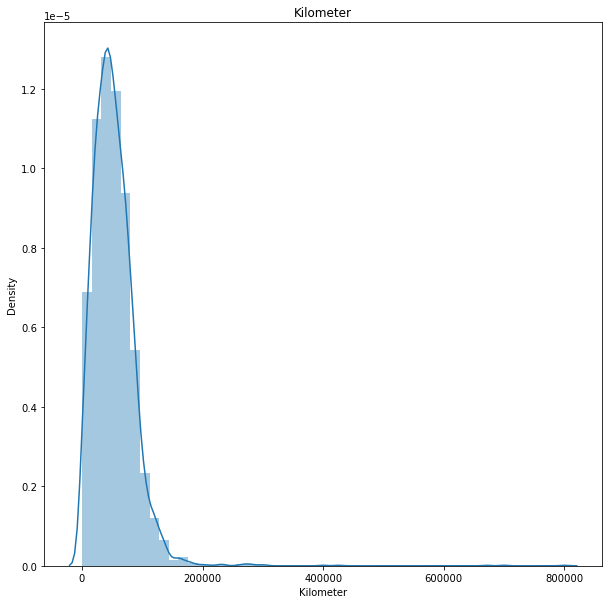

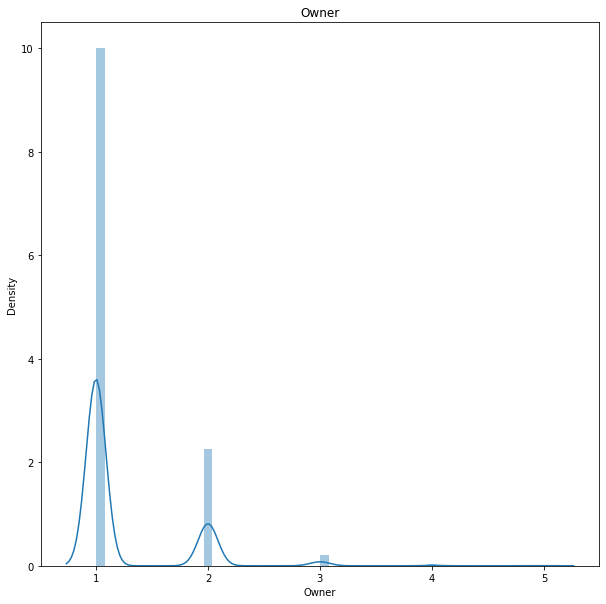

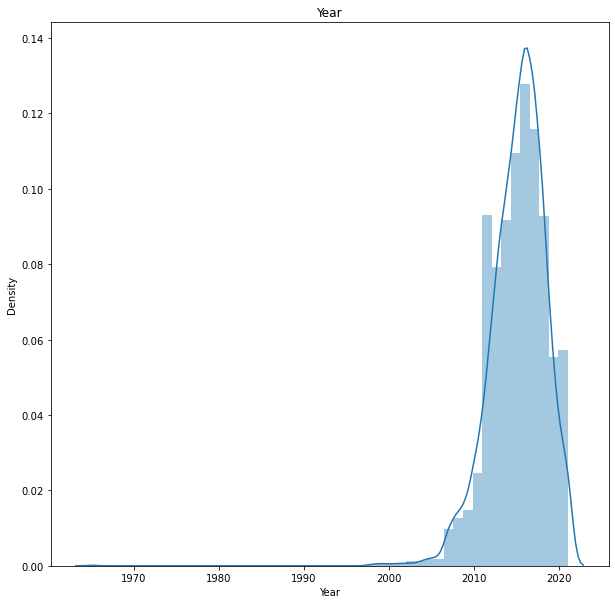

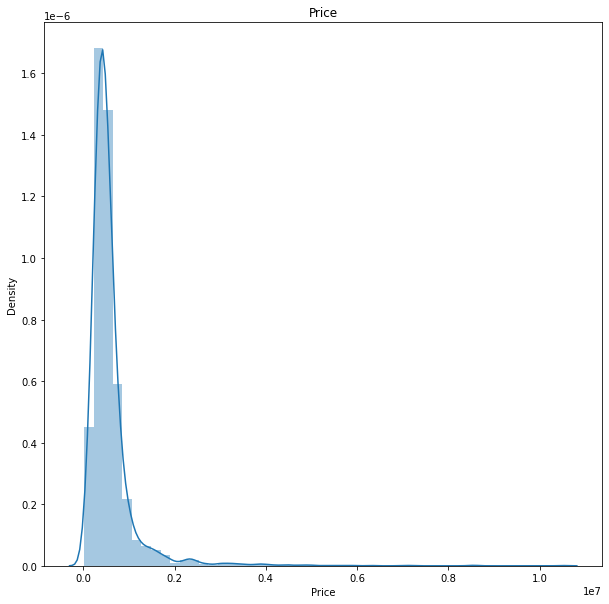

In [42]:
# Lets visualize all the numerical columns using distplot
for i in df[integer]:
    plt.figure(figsize=(10,10))
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

* Here we can see that most of the cars which are available for resale are driven less than 100000 kms.
* Second graph shows that most of the cars available for resale in the market are 1st Owner.
* In third graph we can see that most of the cars available for resale are registered or manufactured in between 2015 to 2018.

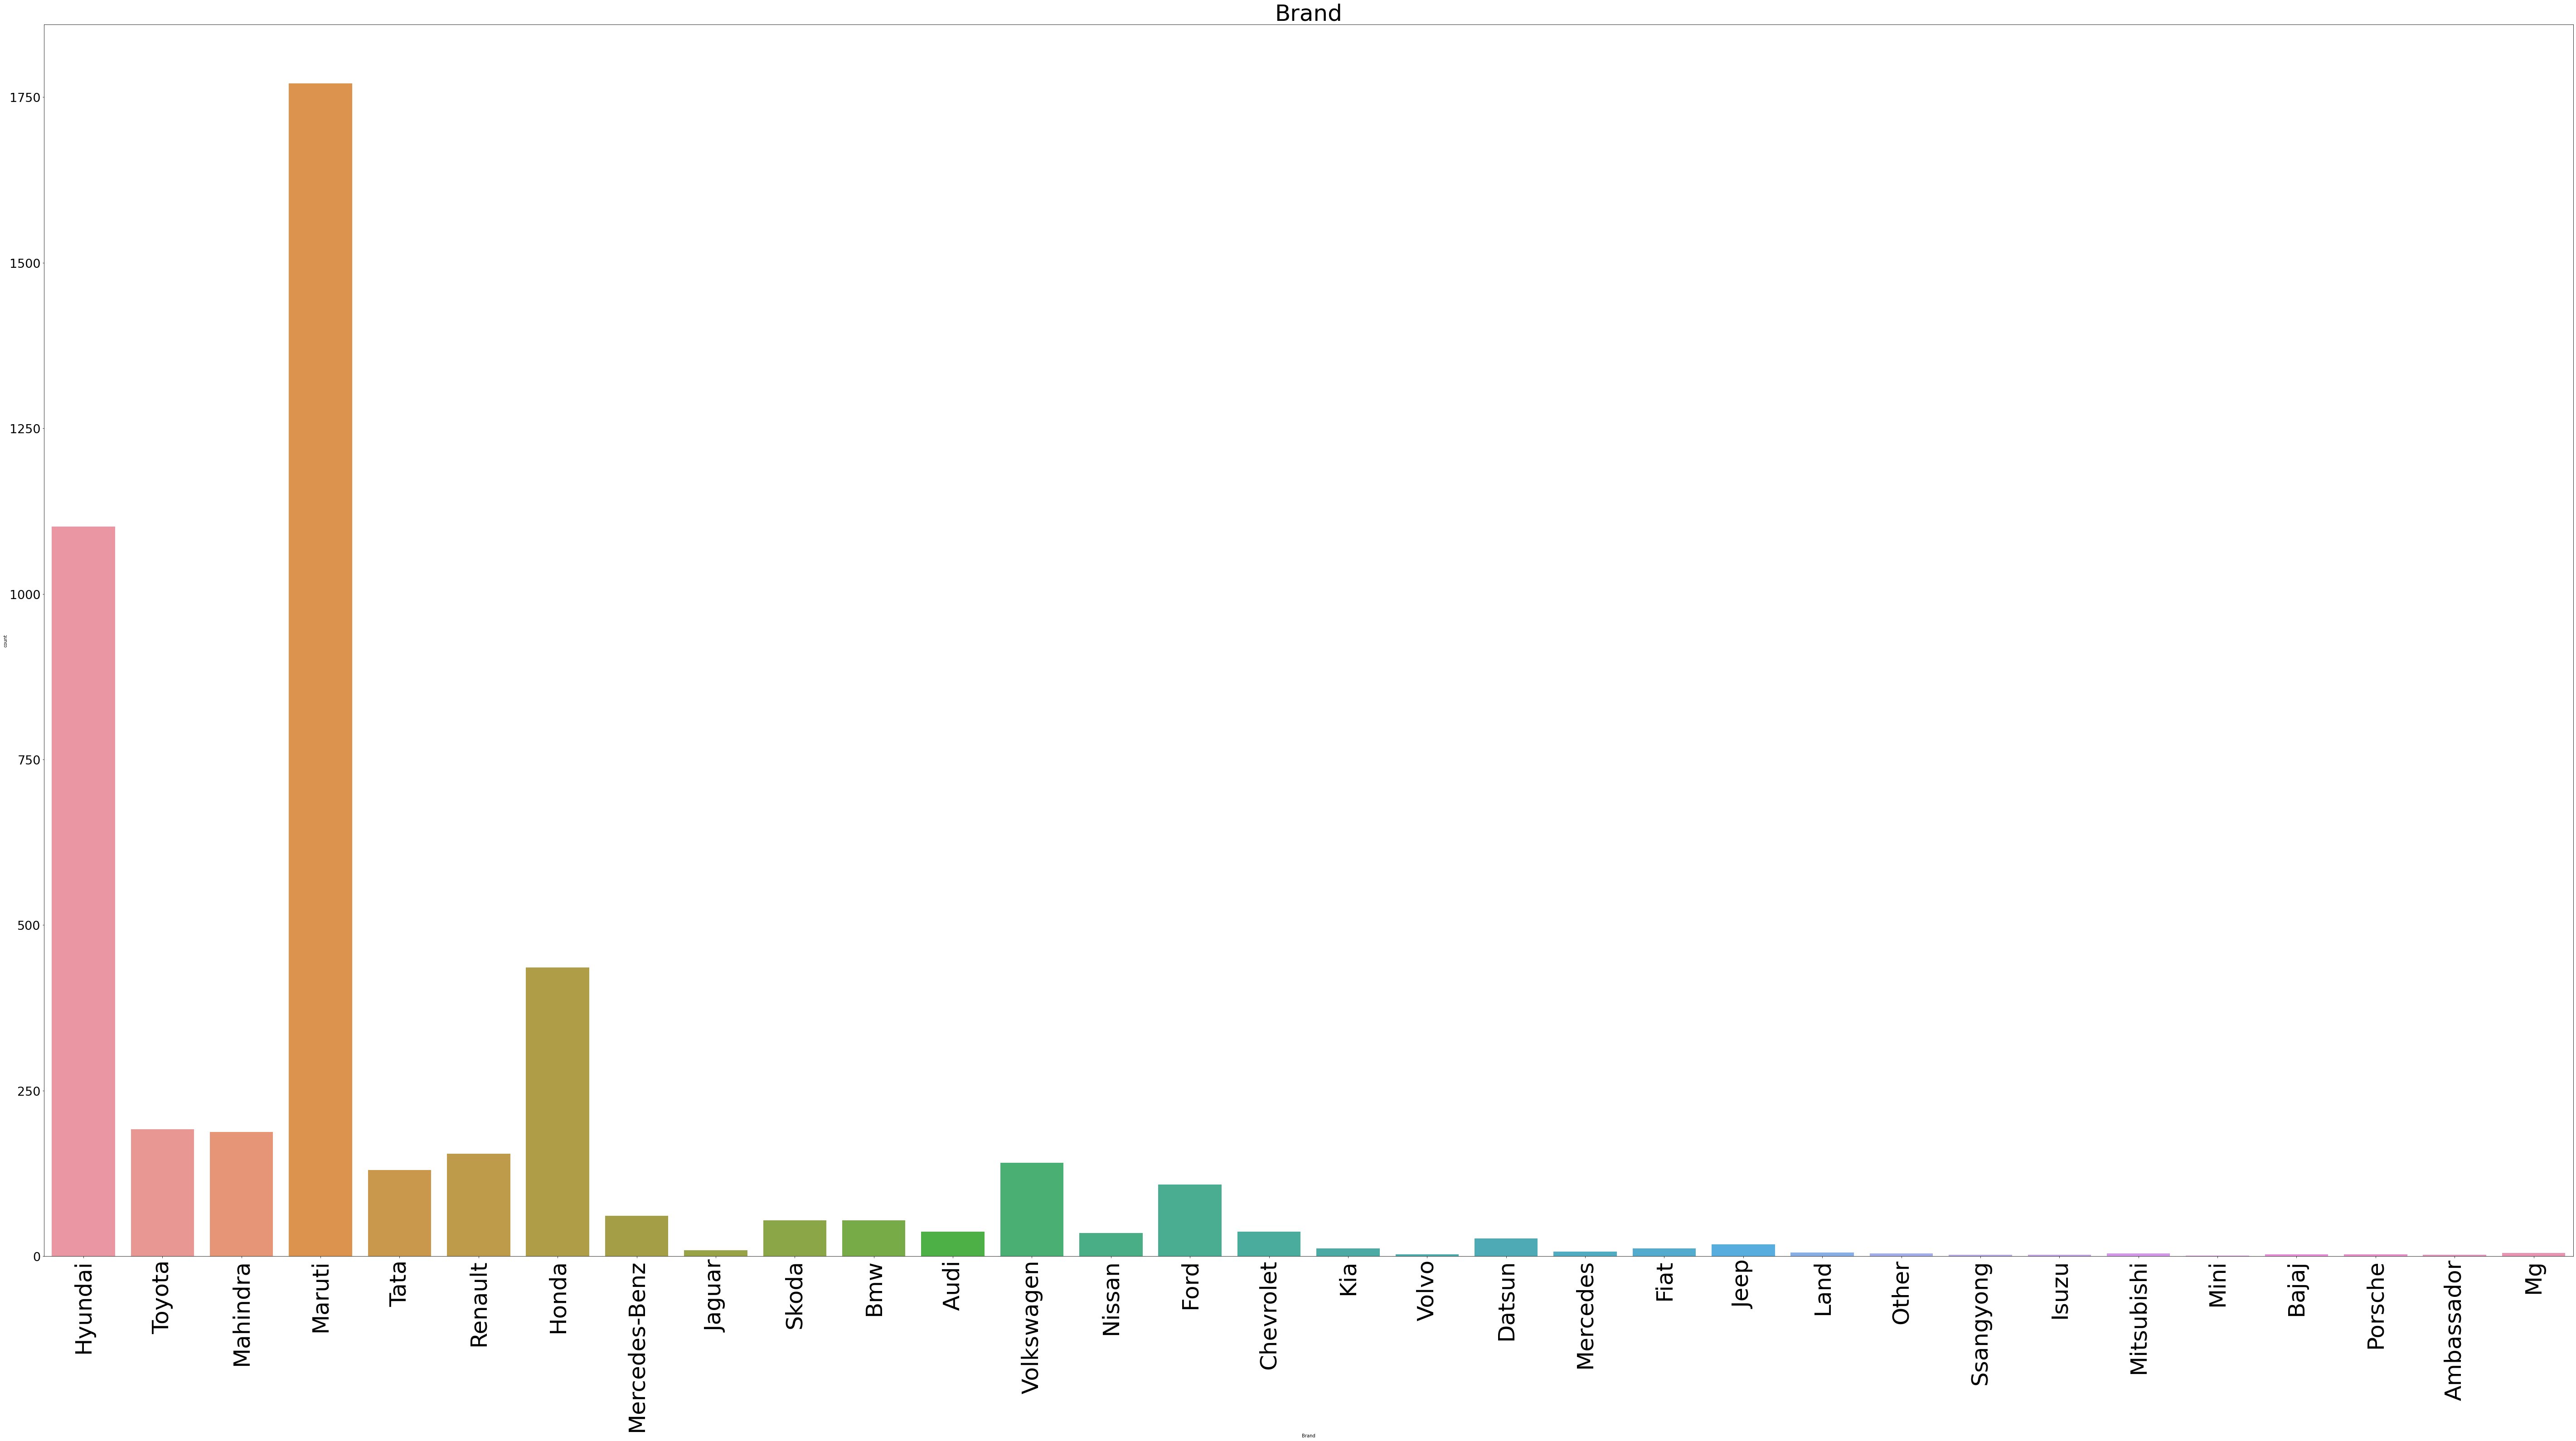

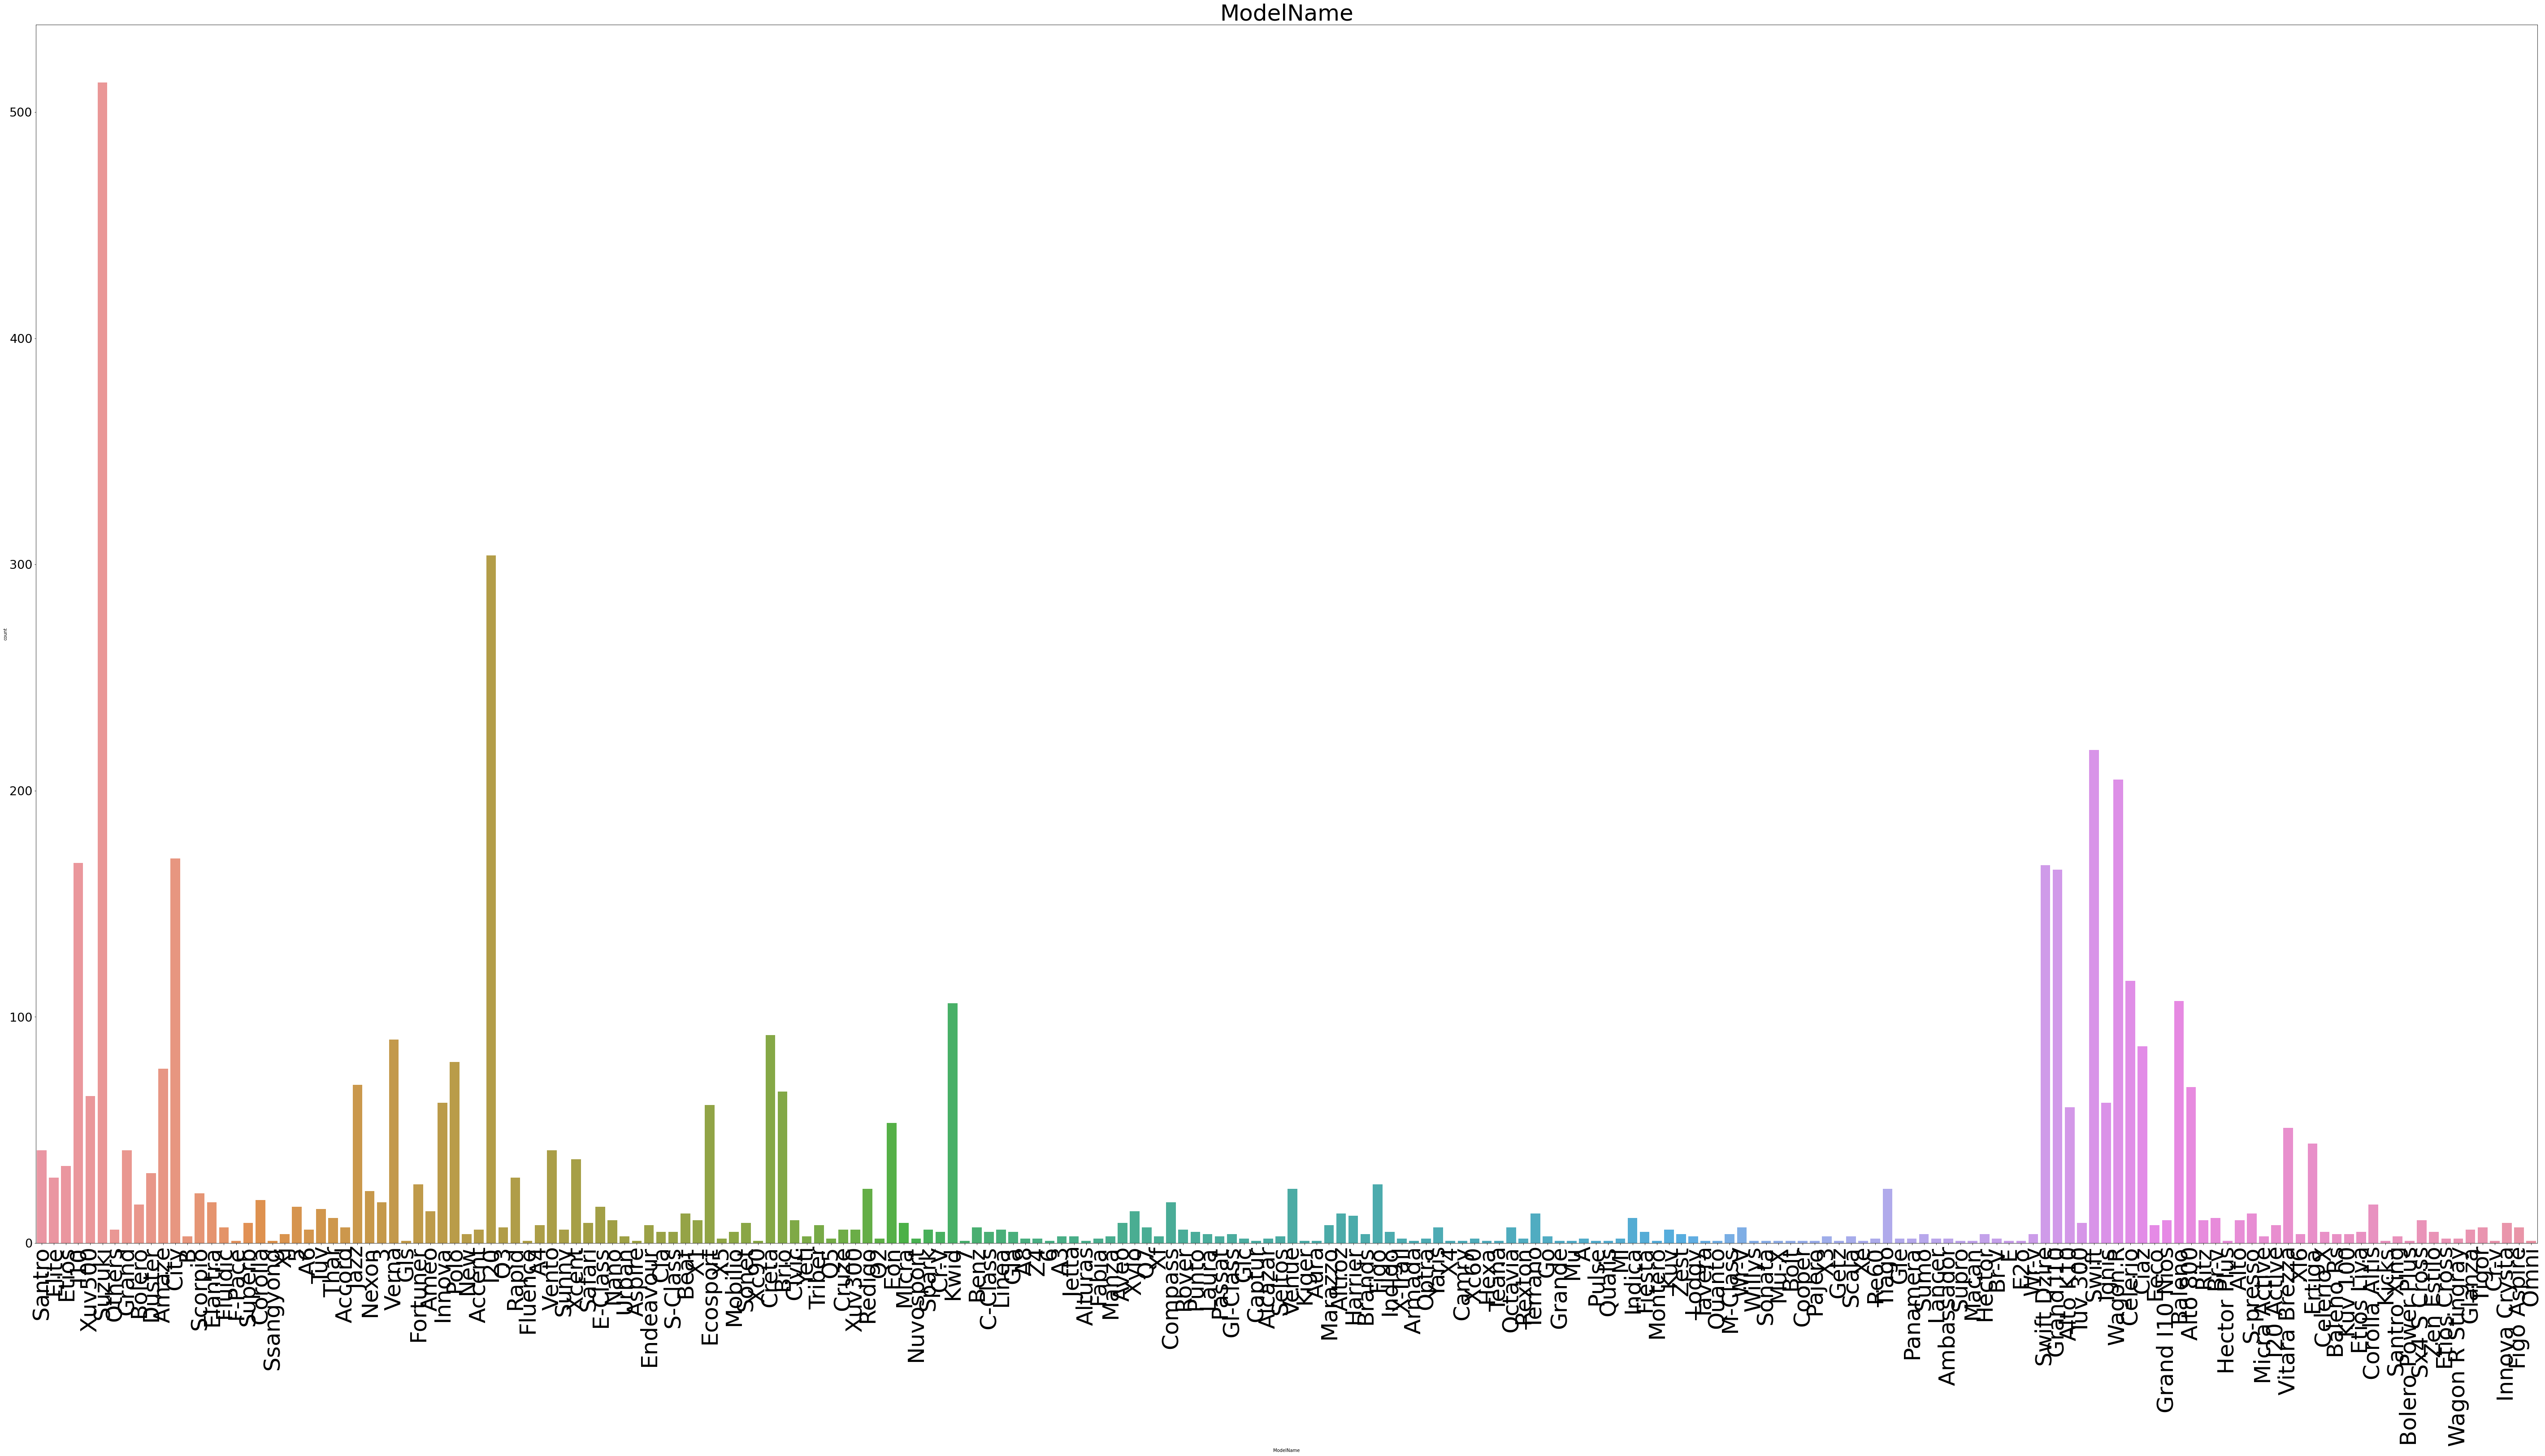

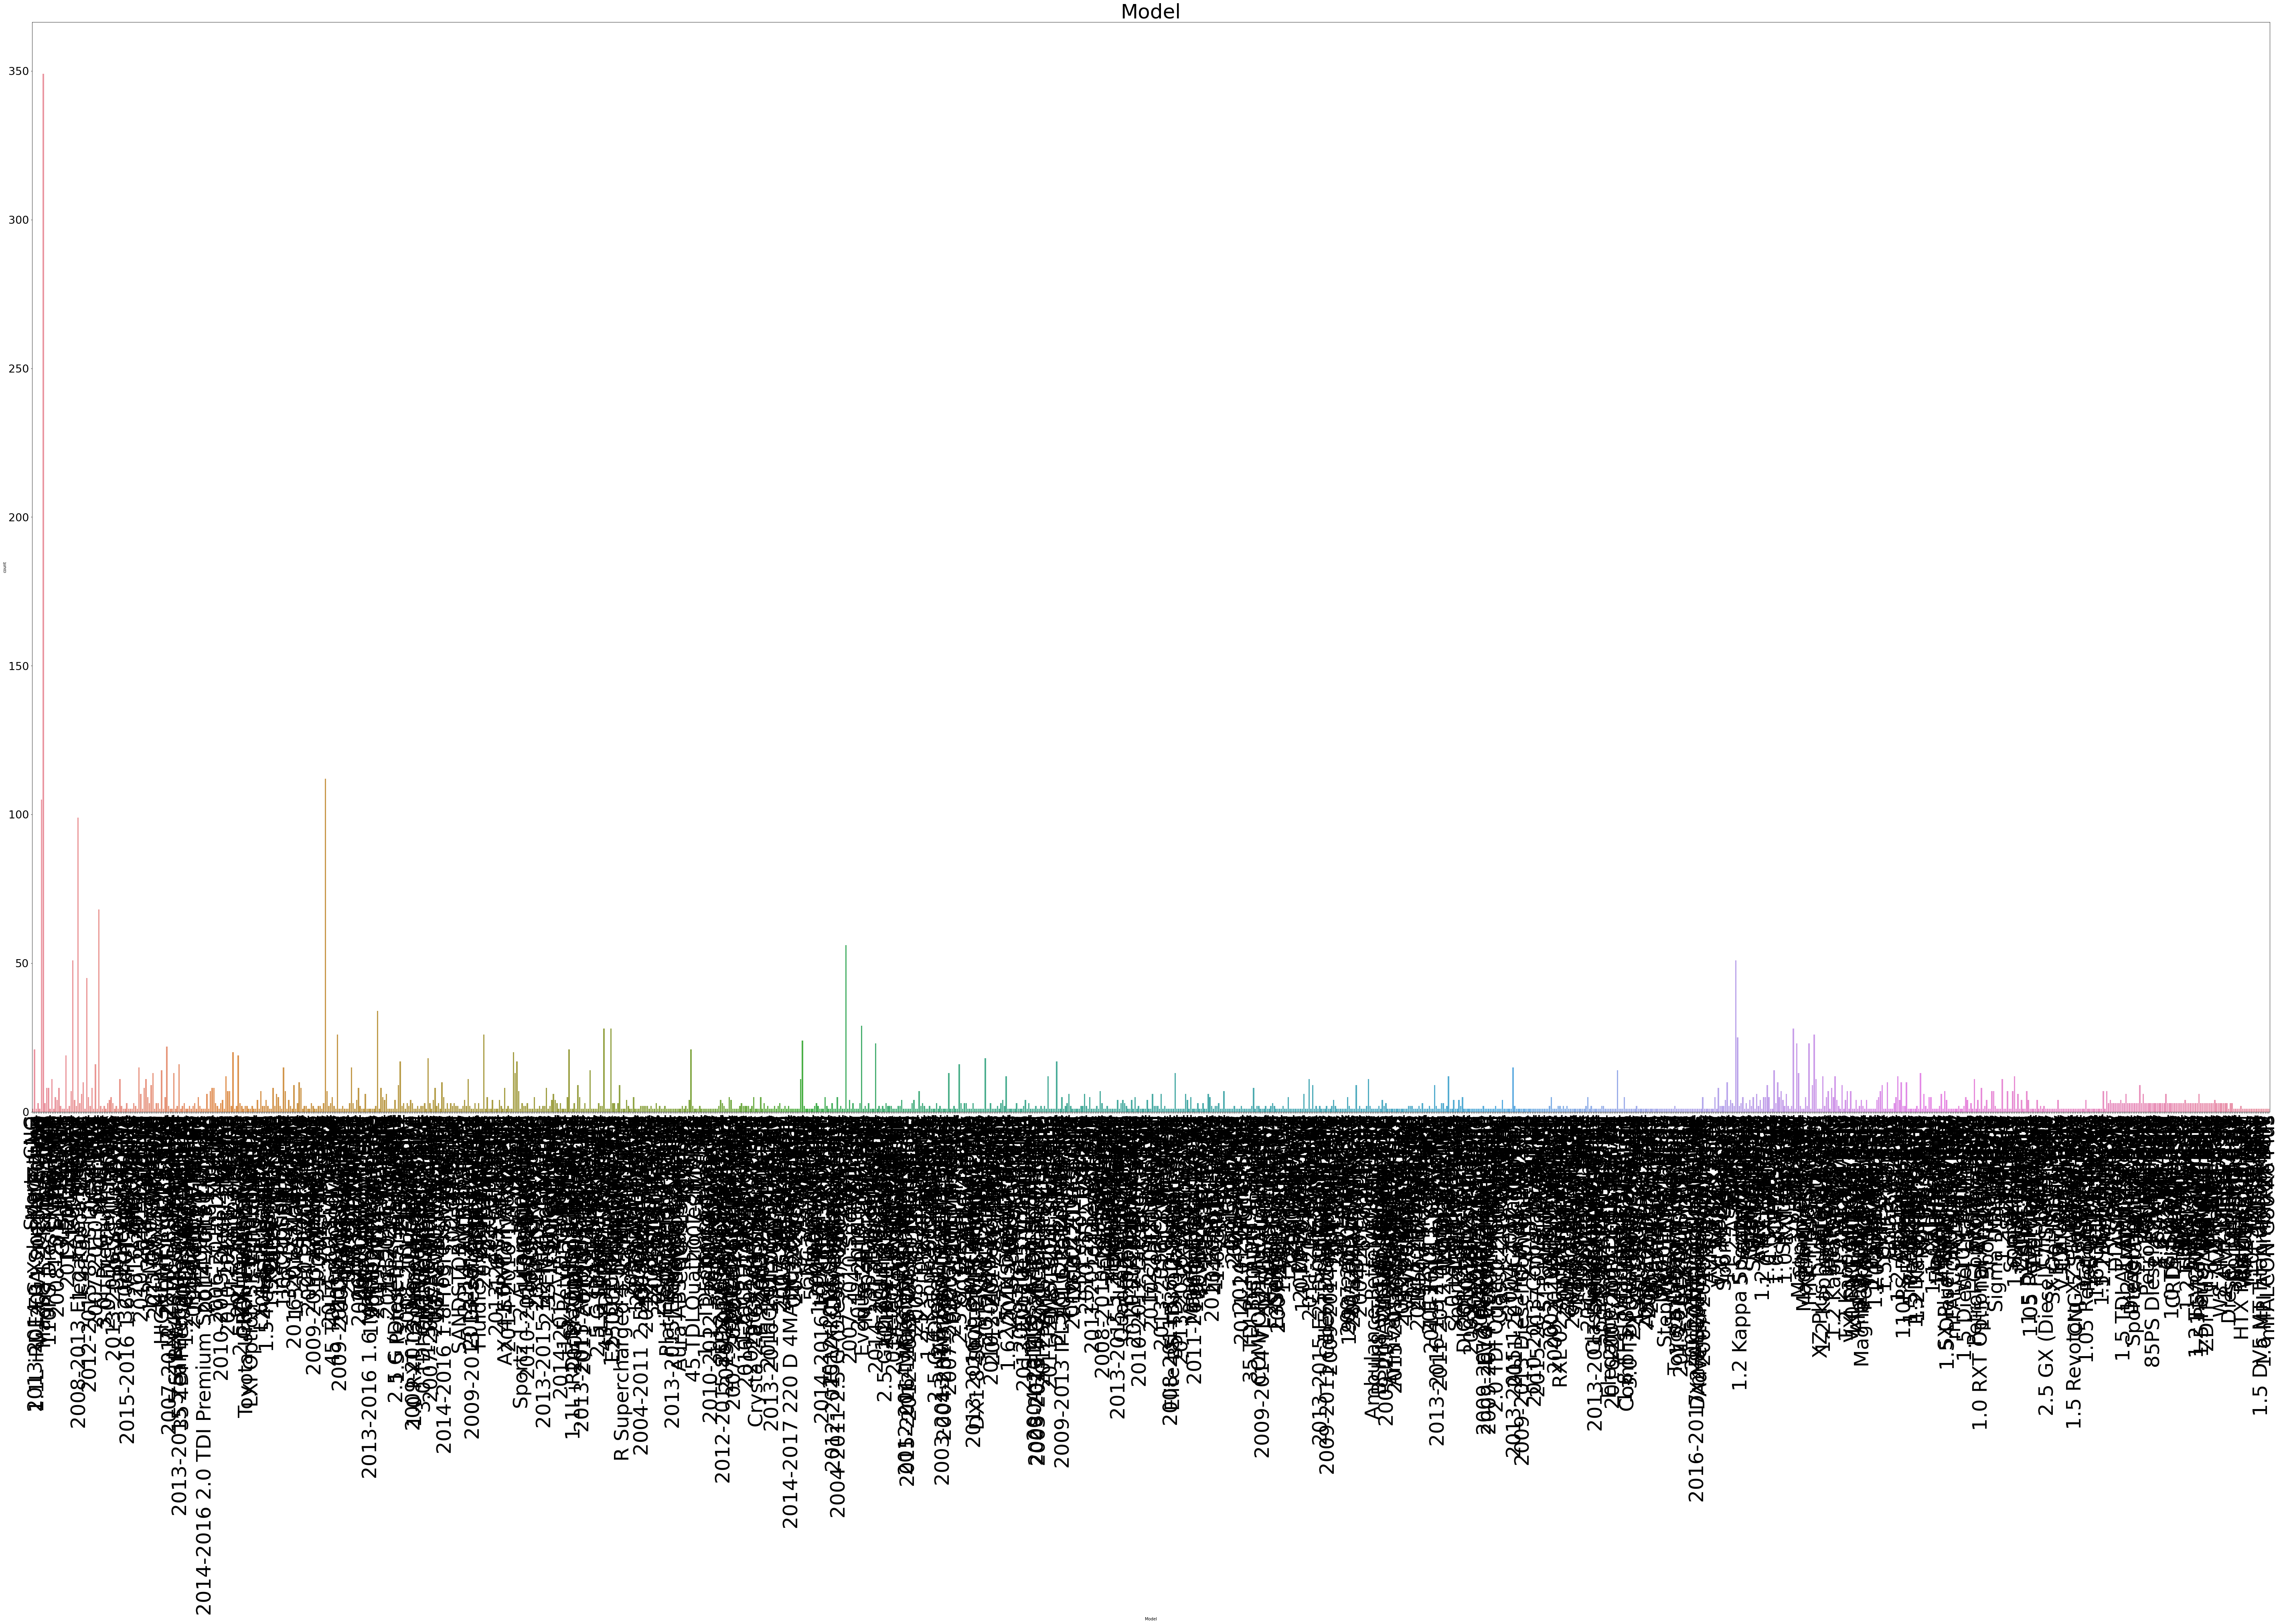

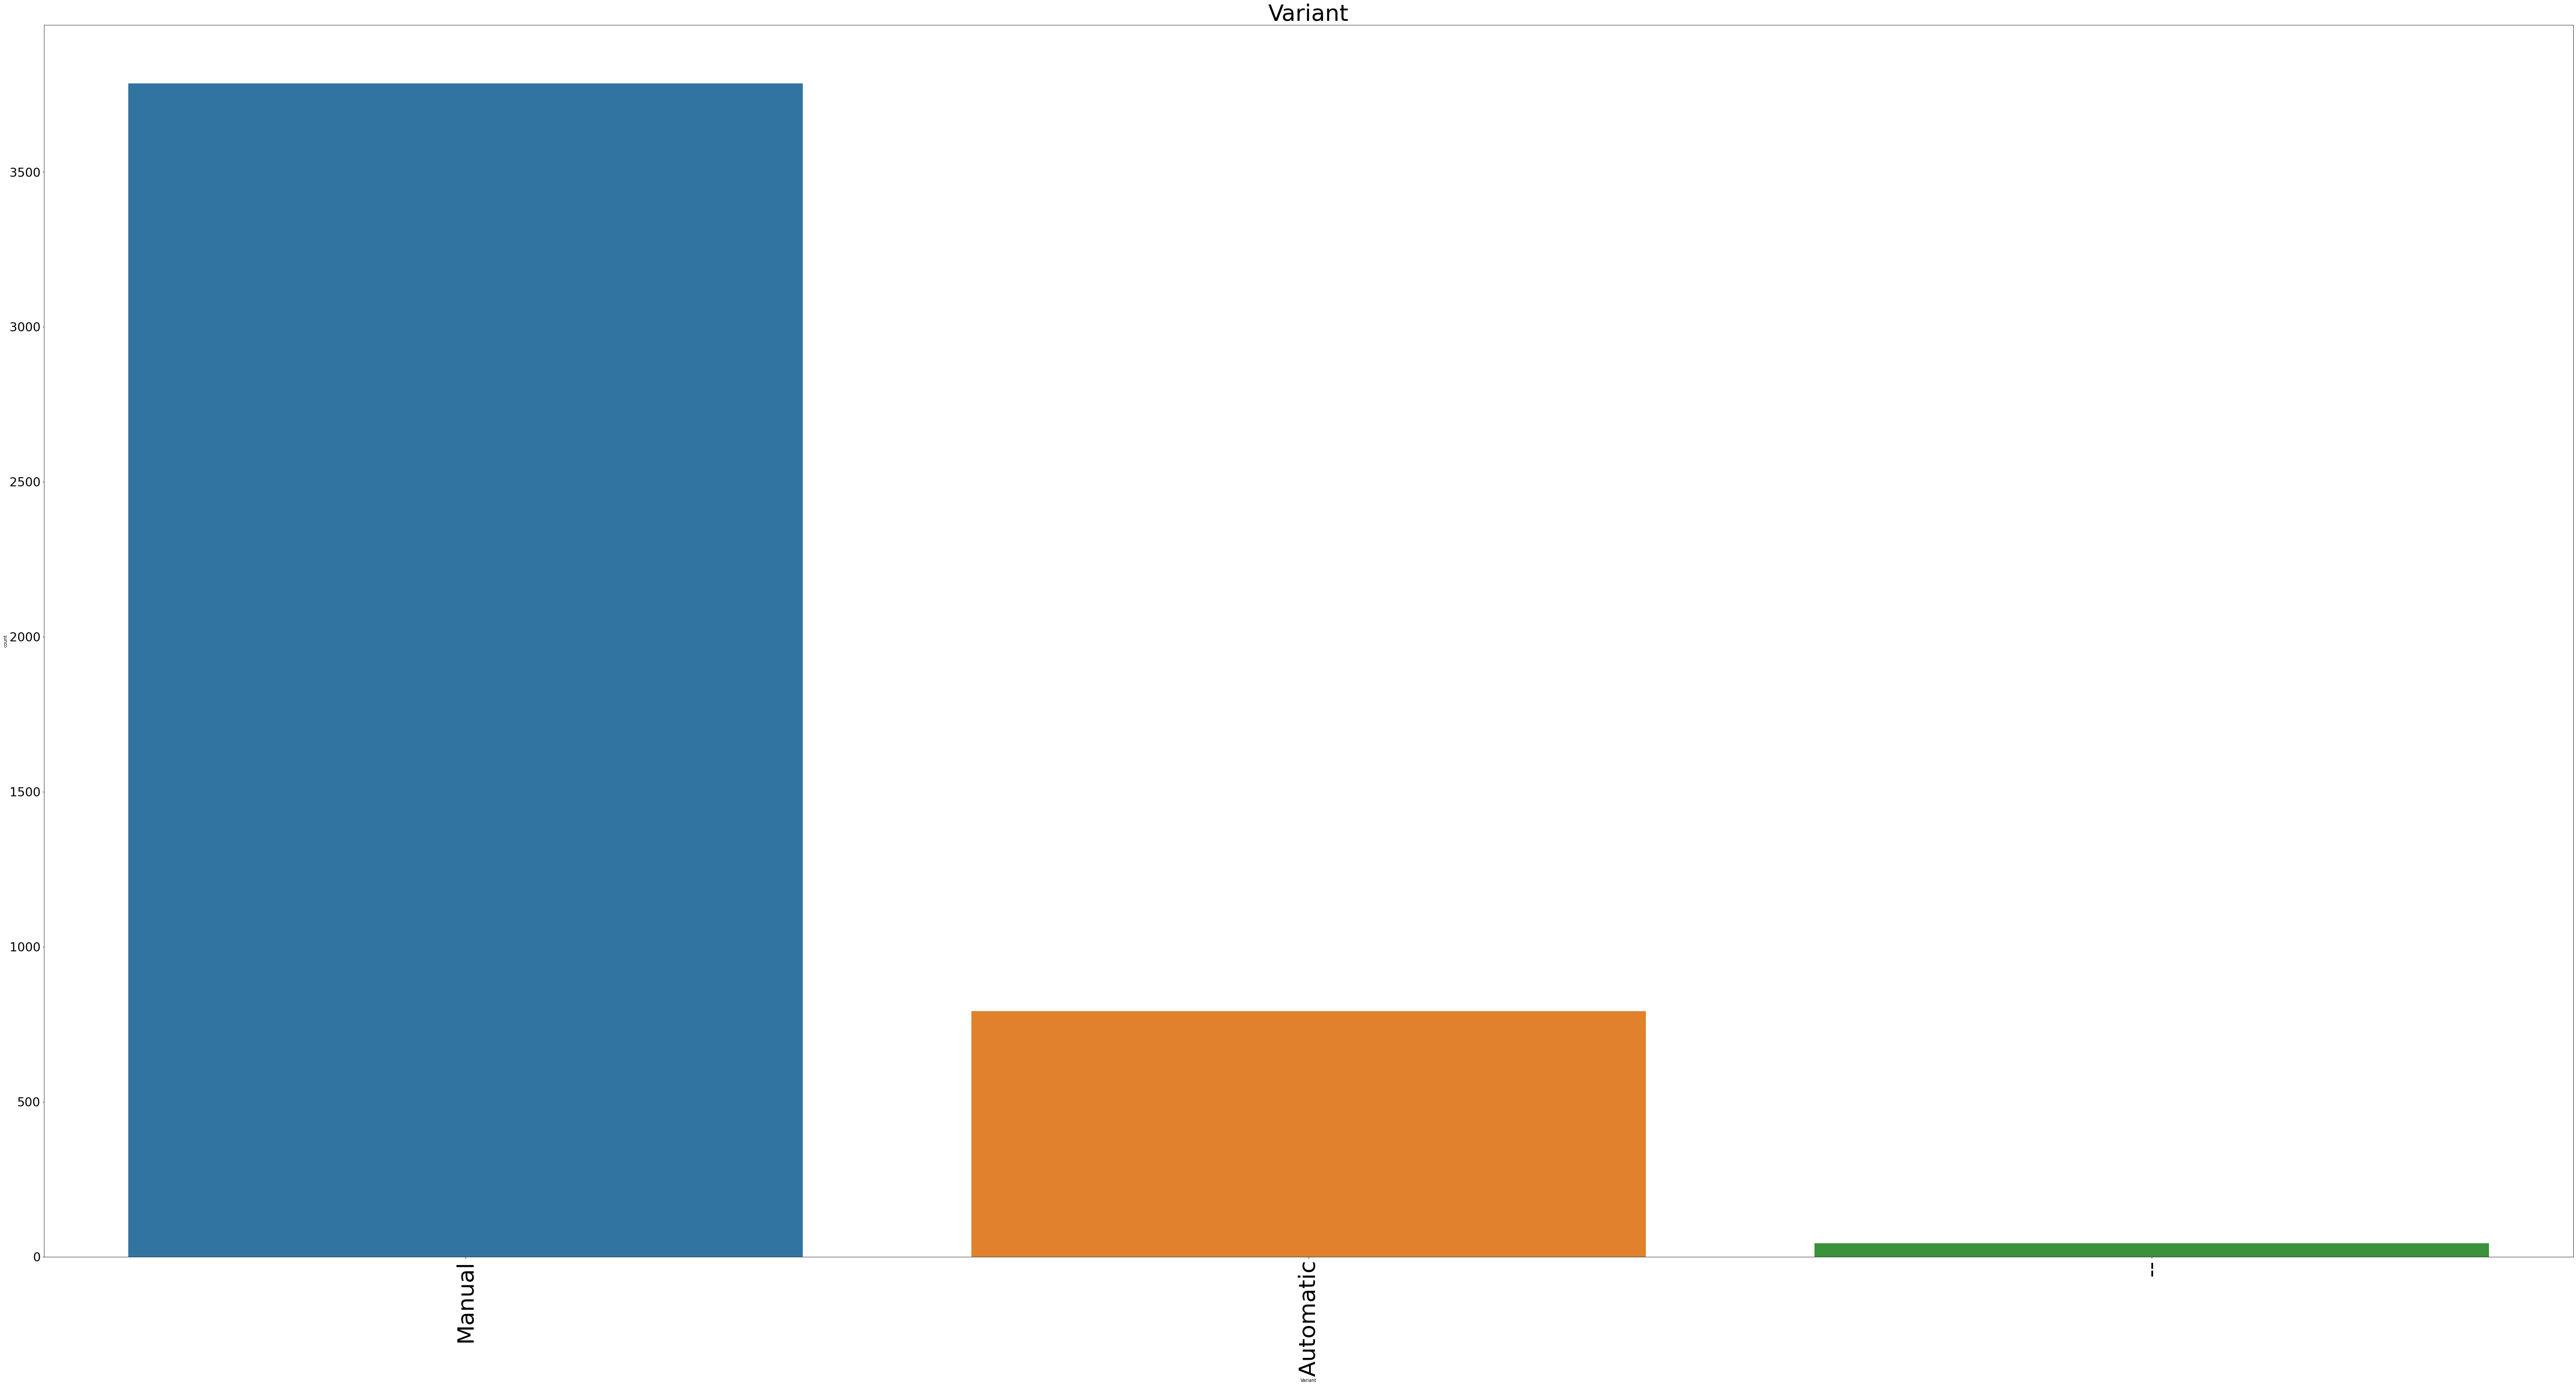

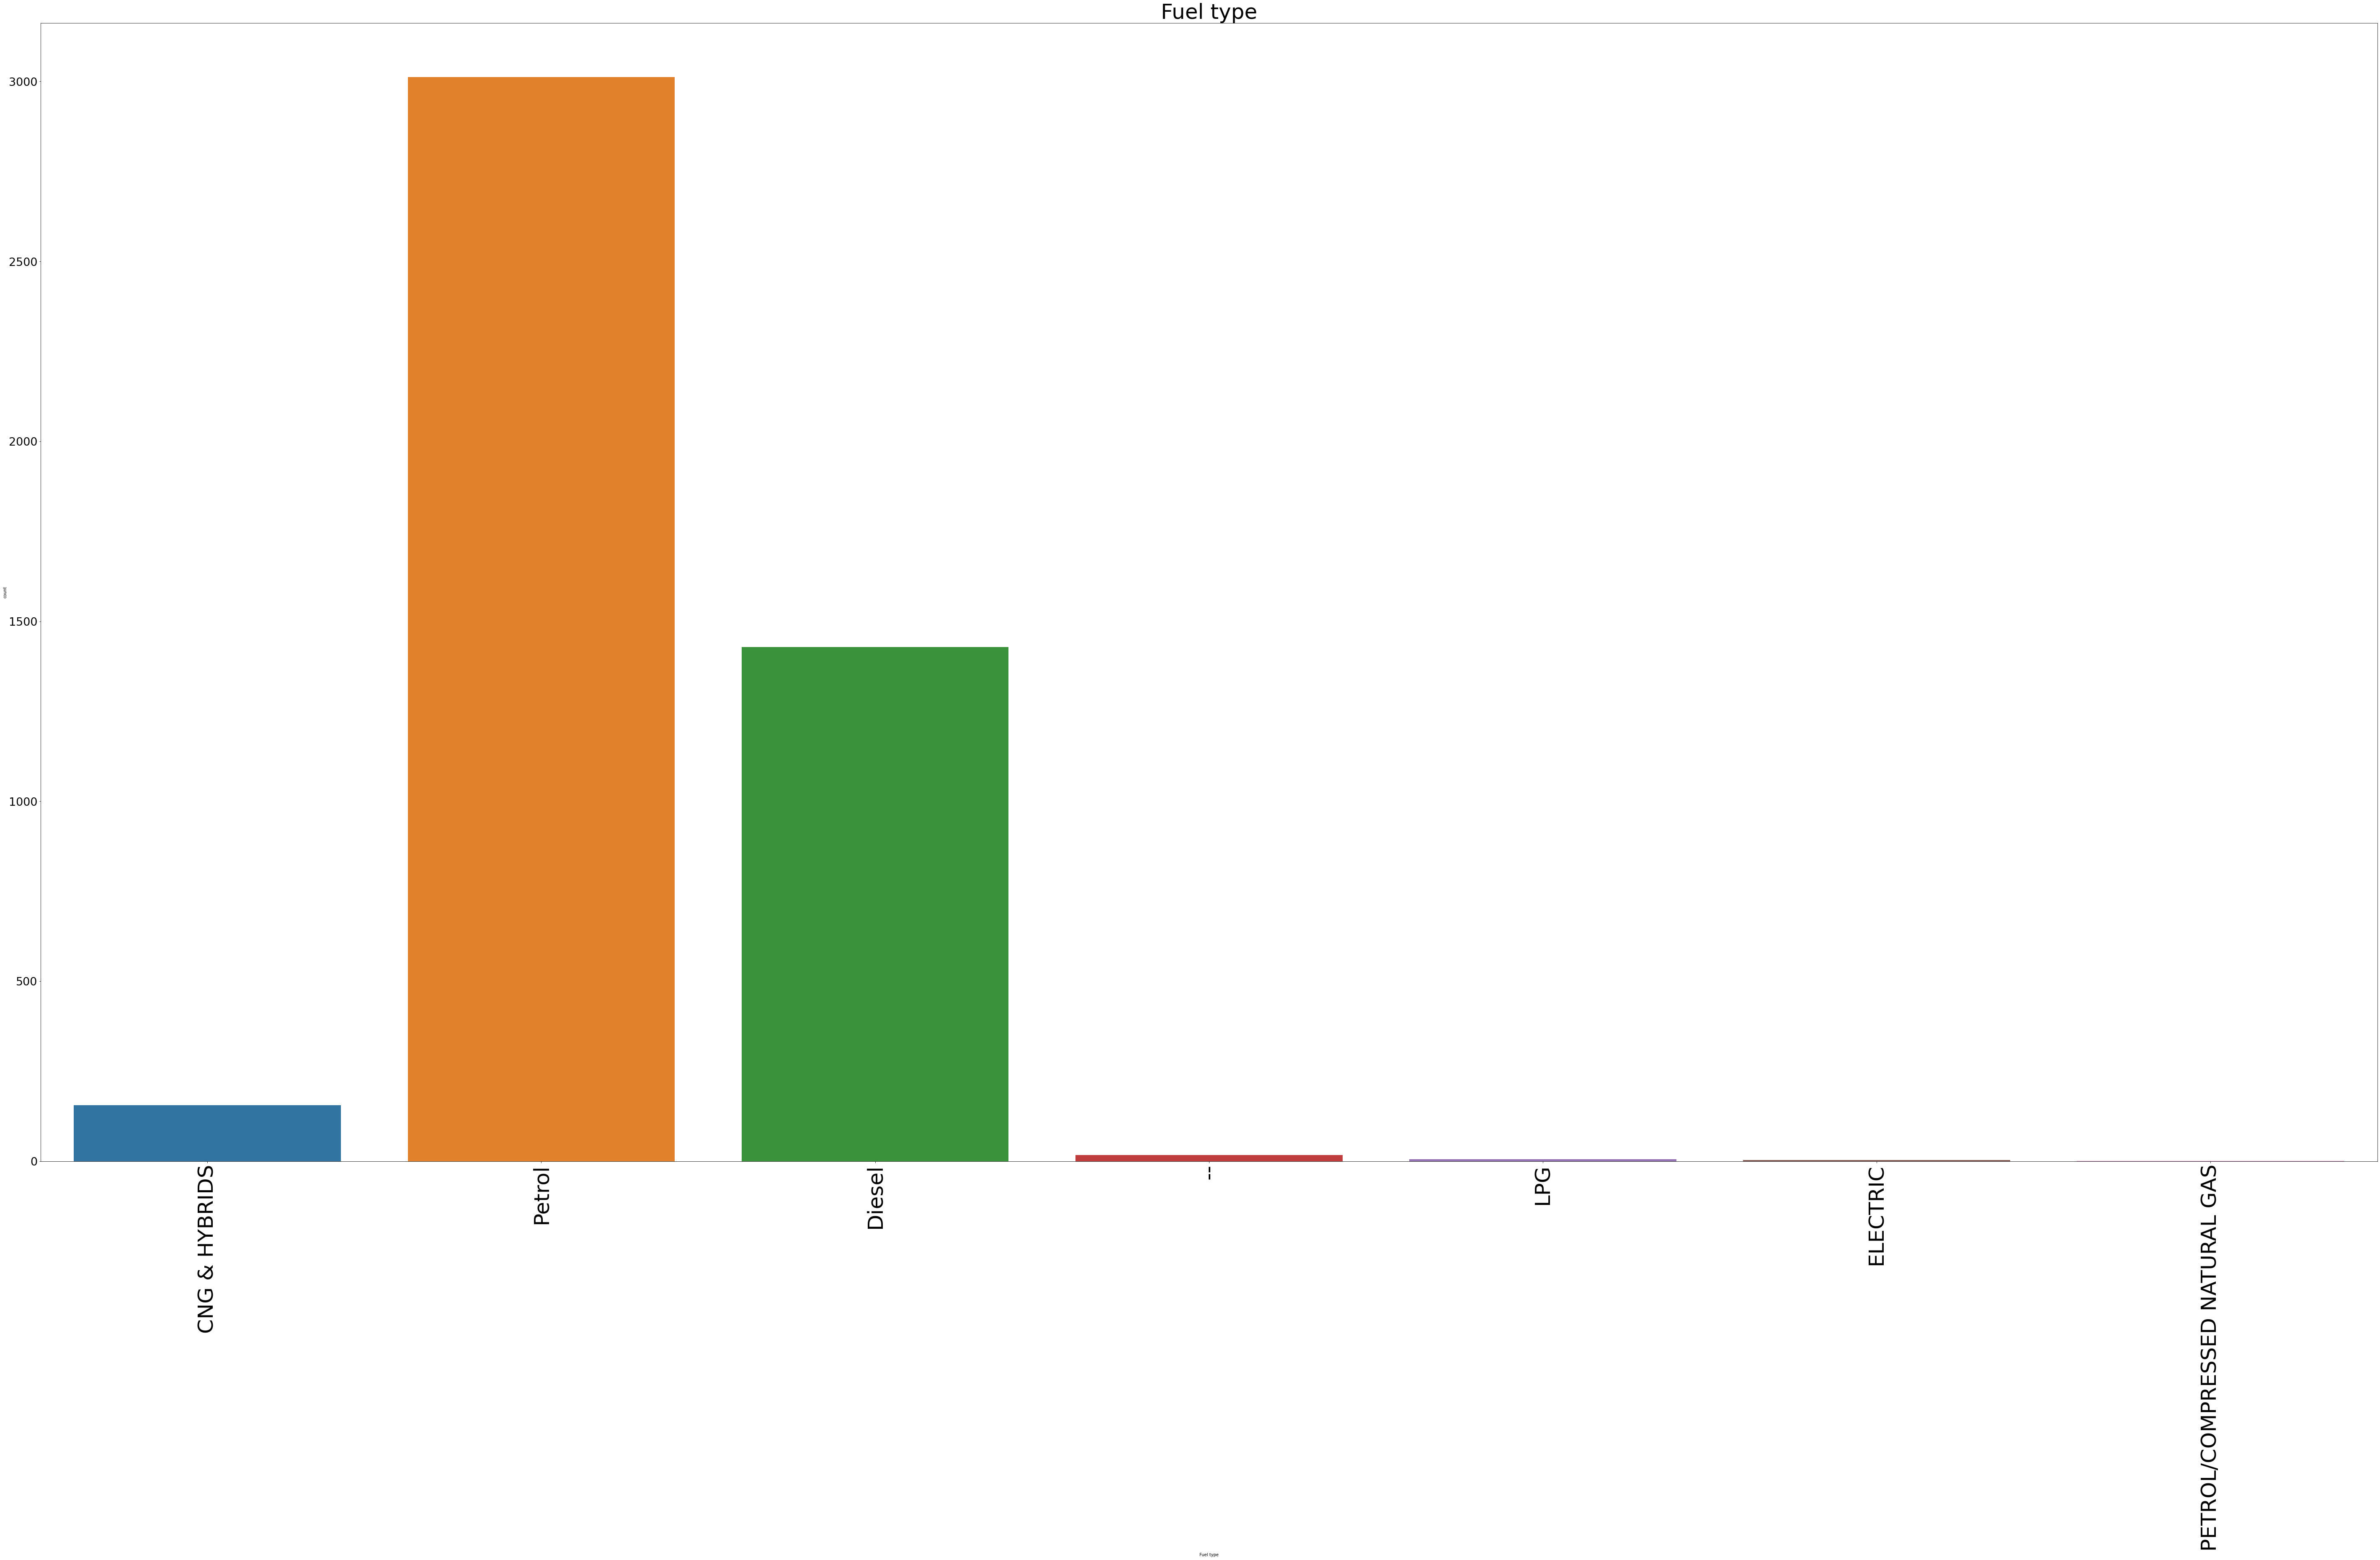

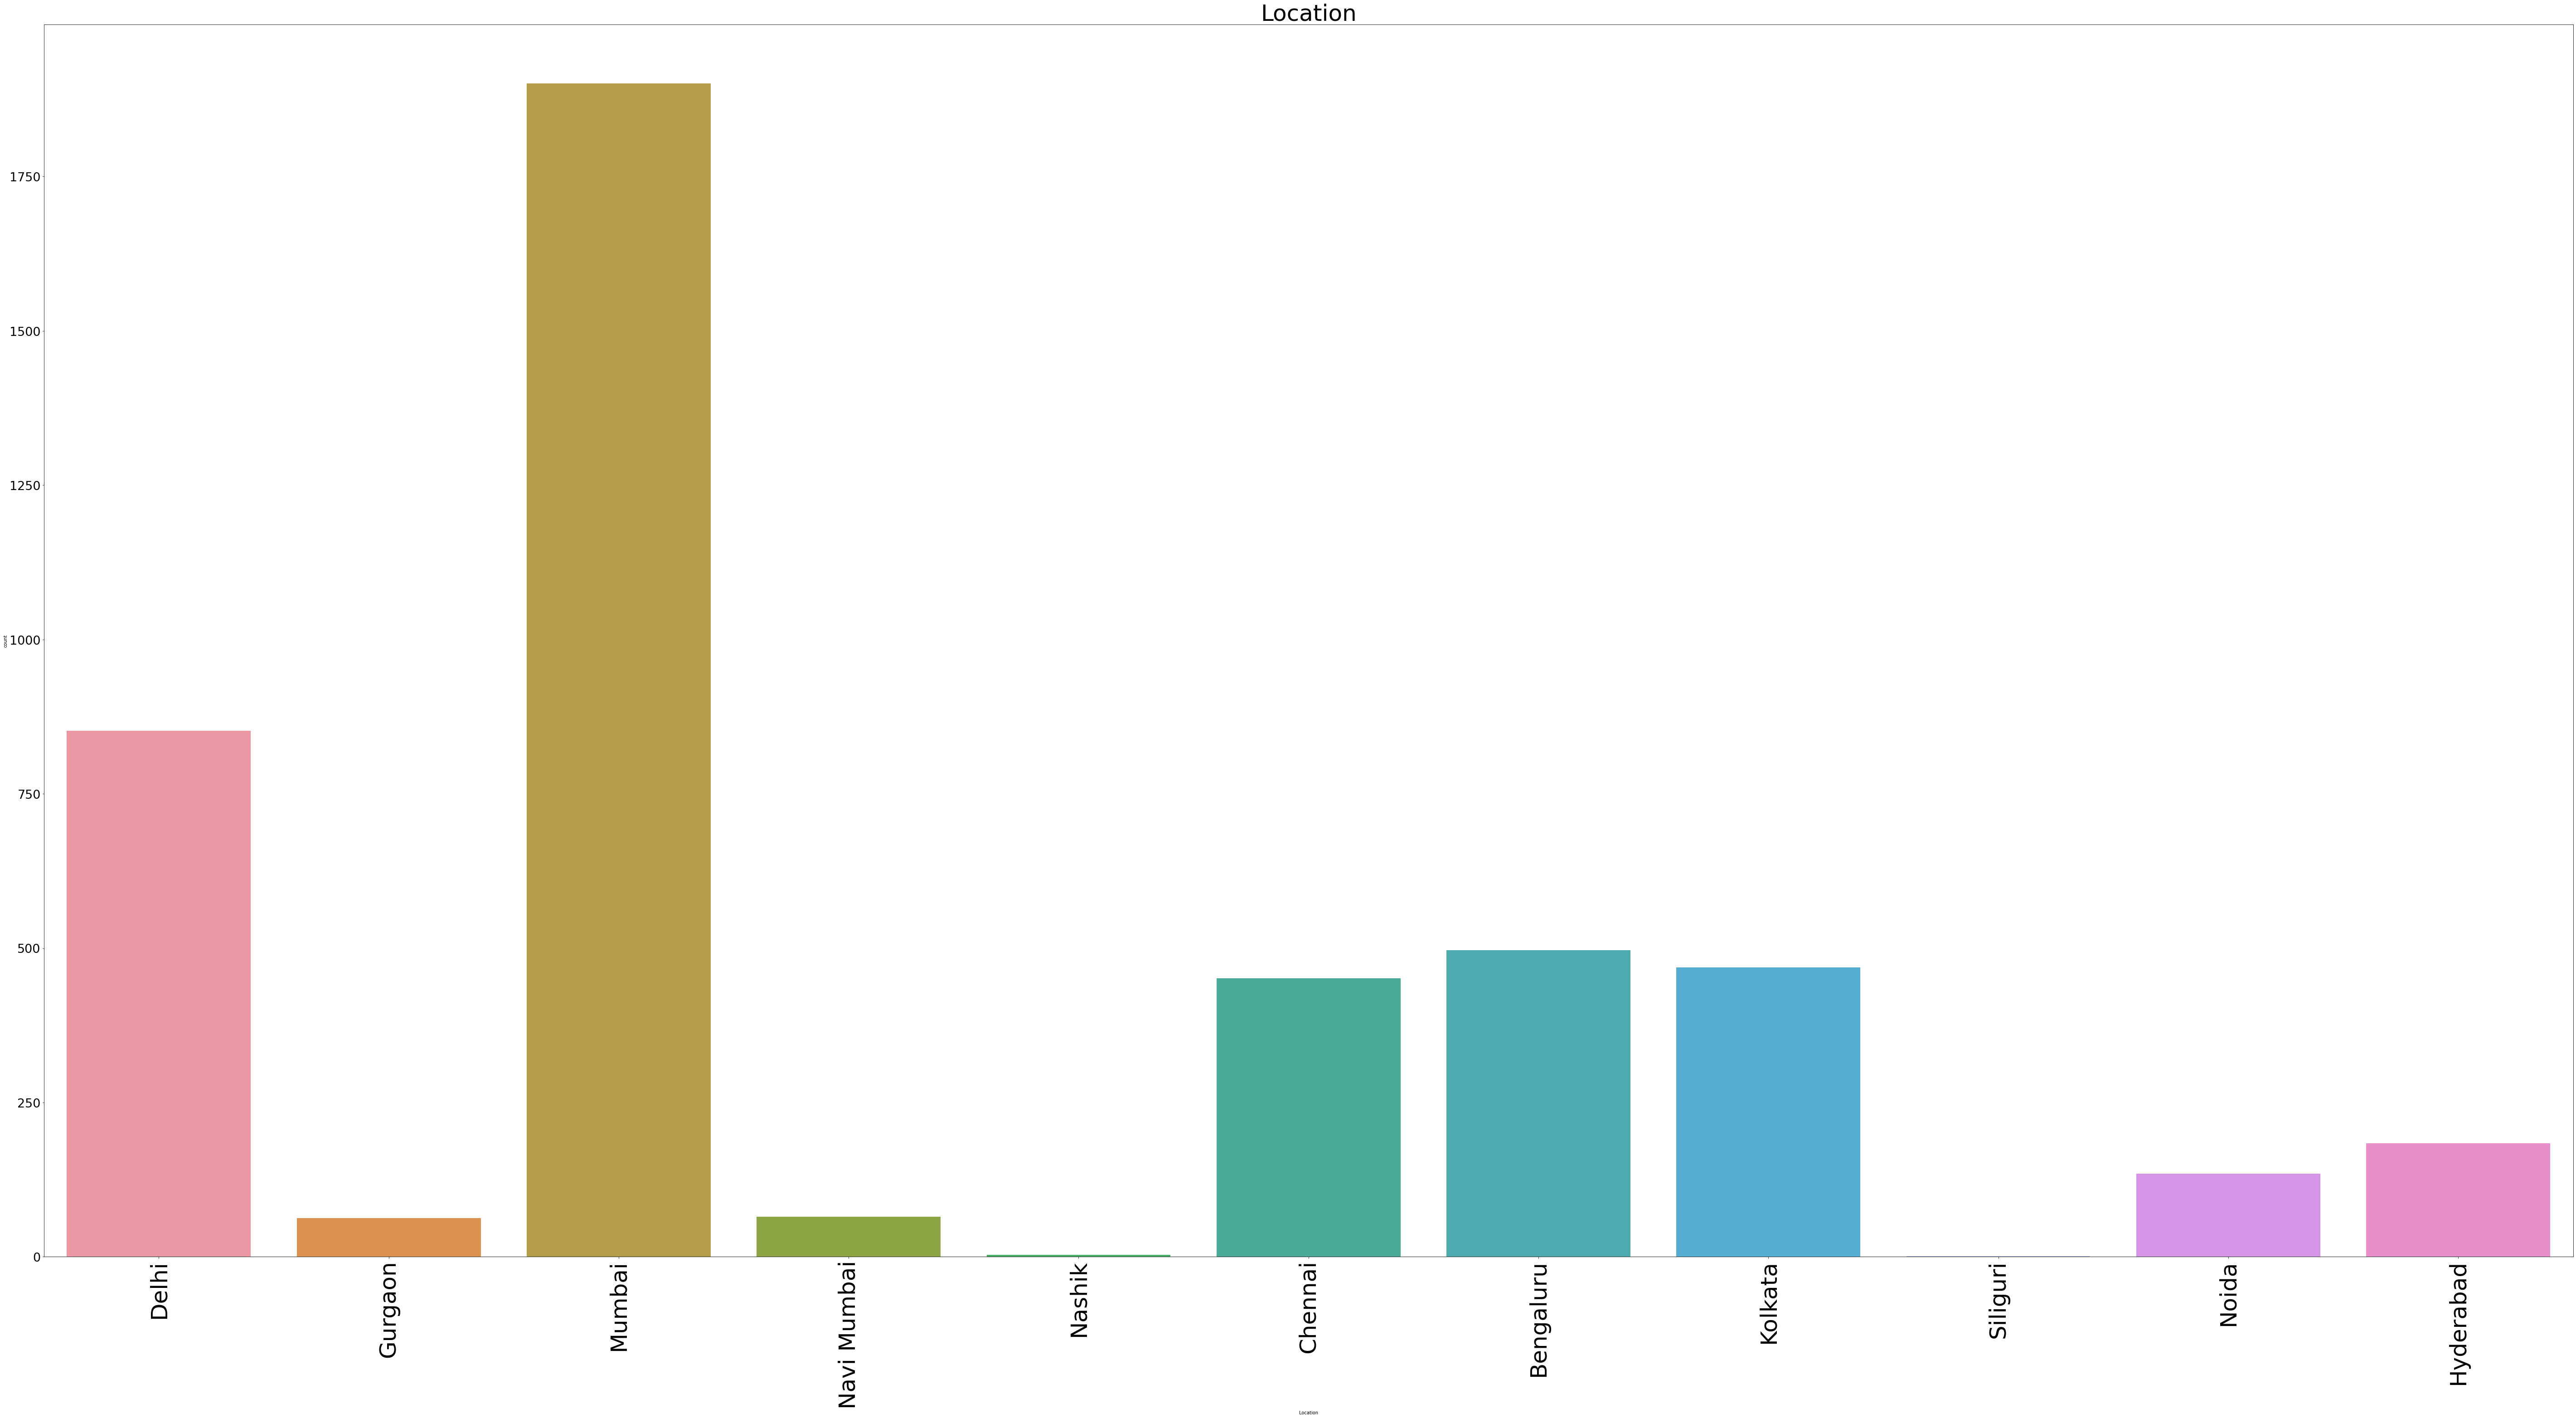

In [67]:
# Lets visualise all categorical columns using pie plot
for i in df[object]:
    plt.figure(figsize=(100,50))
    sns.countplot(df[i])
    plt.title(i, fontsize=50)
    plt.xticks(rotation=90, fontsize=50)
    plt.yticks(fontsize=27)
    plt.show()

* Here in categorical columns in 1st picture we can clearly see that most cars available for resale are manufactured by Maruti, followed by Hyundai, Honda, Toyota, Mahindra, Renault, Volkswagen, TATA, Ford, then imported cars.
* In second picture we can see no. of used cars model wise abailable for sale it is lead by maruti alto, Hyundai i20, then others.
* In third picture we can visualize further diversifaction, which shows particular variant of particular car, is it a top model or the lowest of that particular model.
* 4th picture shows us the transmission type, which confirms that most of the people in INDIA still prefers Manual drive far more than Automatic Transmission.
* 5th picture shows us the Fuel type, which confirms that most of the people prefer Petrol cars as they are comparitively cheaper as compared to any other Fuel type.
* In last picture we can clearly see that the data which we have gathered, it includes most no. of cars from Mumbai, then Delhi and so on.

# BiVairate Analysis:

<AxesSubplot:xlabel='Year', ylabel='Kilometer'>

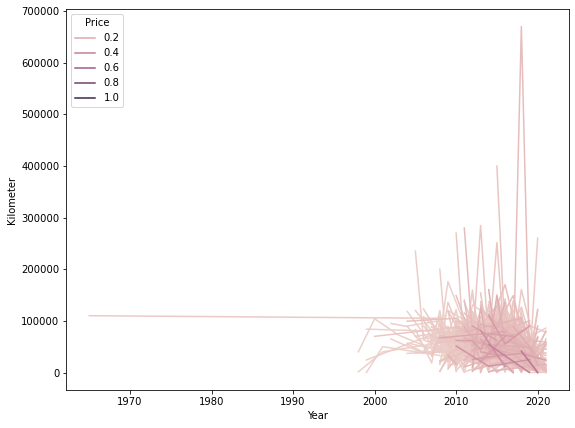

In [61]:
# lets compare features and will try finding out correlation between them
plt.figure(figsize=(9,7))
sns.lineplot(x='Year', y='Kilometer', hue='Price',data=df, ci=None)

* Here we can clearly see that cars between 2015 to 2020 and driven less than 100000 km are costlier as compared to others.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

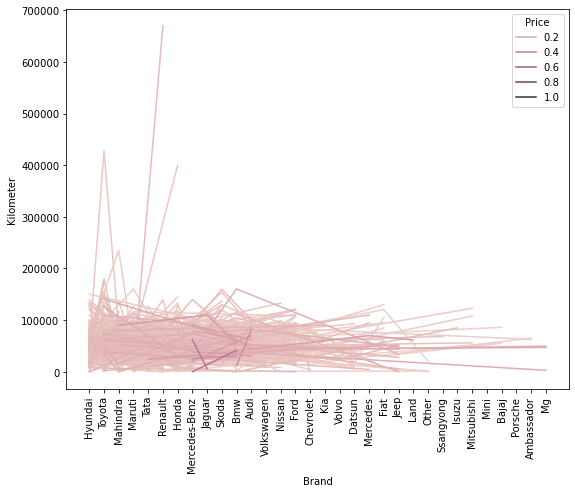

In [68]:
plt.figure(figsize=(9,7))
sns.lineplot(x='Brand', y='Kilometer', hue='Price',data=df, ci=None)
plt.xticks(rotation=90)

* Here we can see that cars which are driven less and belongs to good brands are priced high in comparision to the brands which are less known.

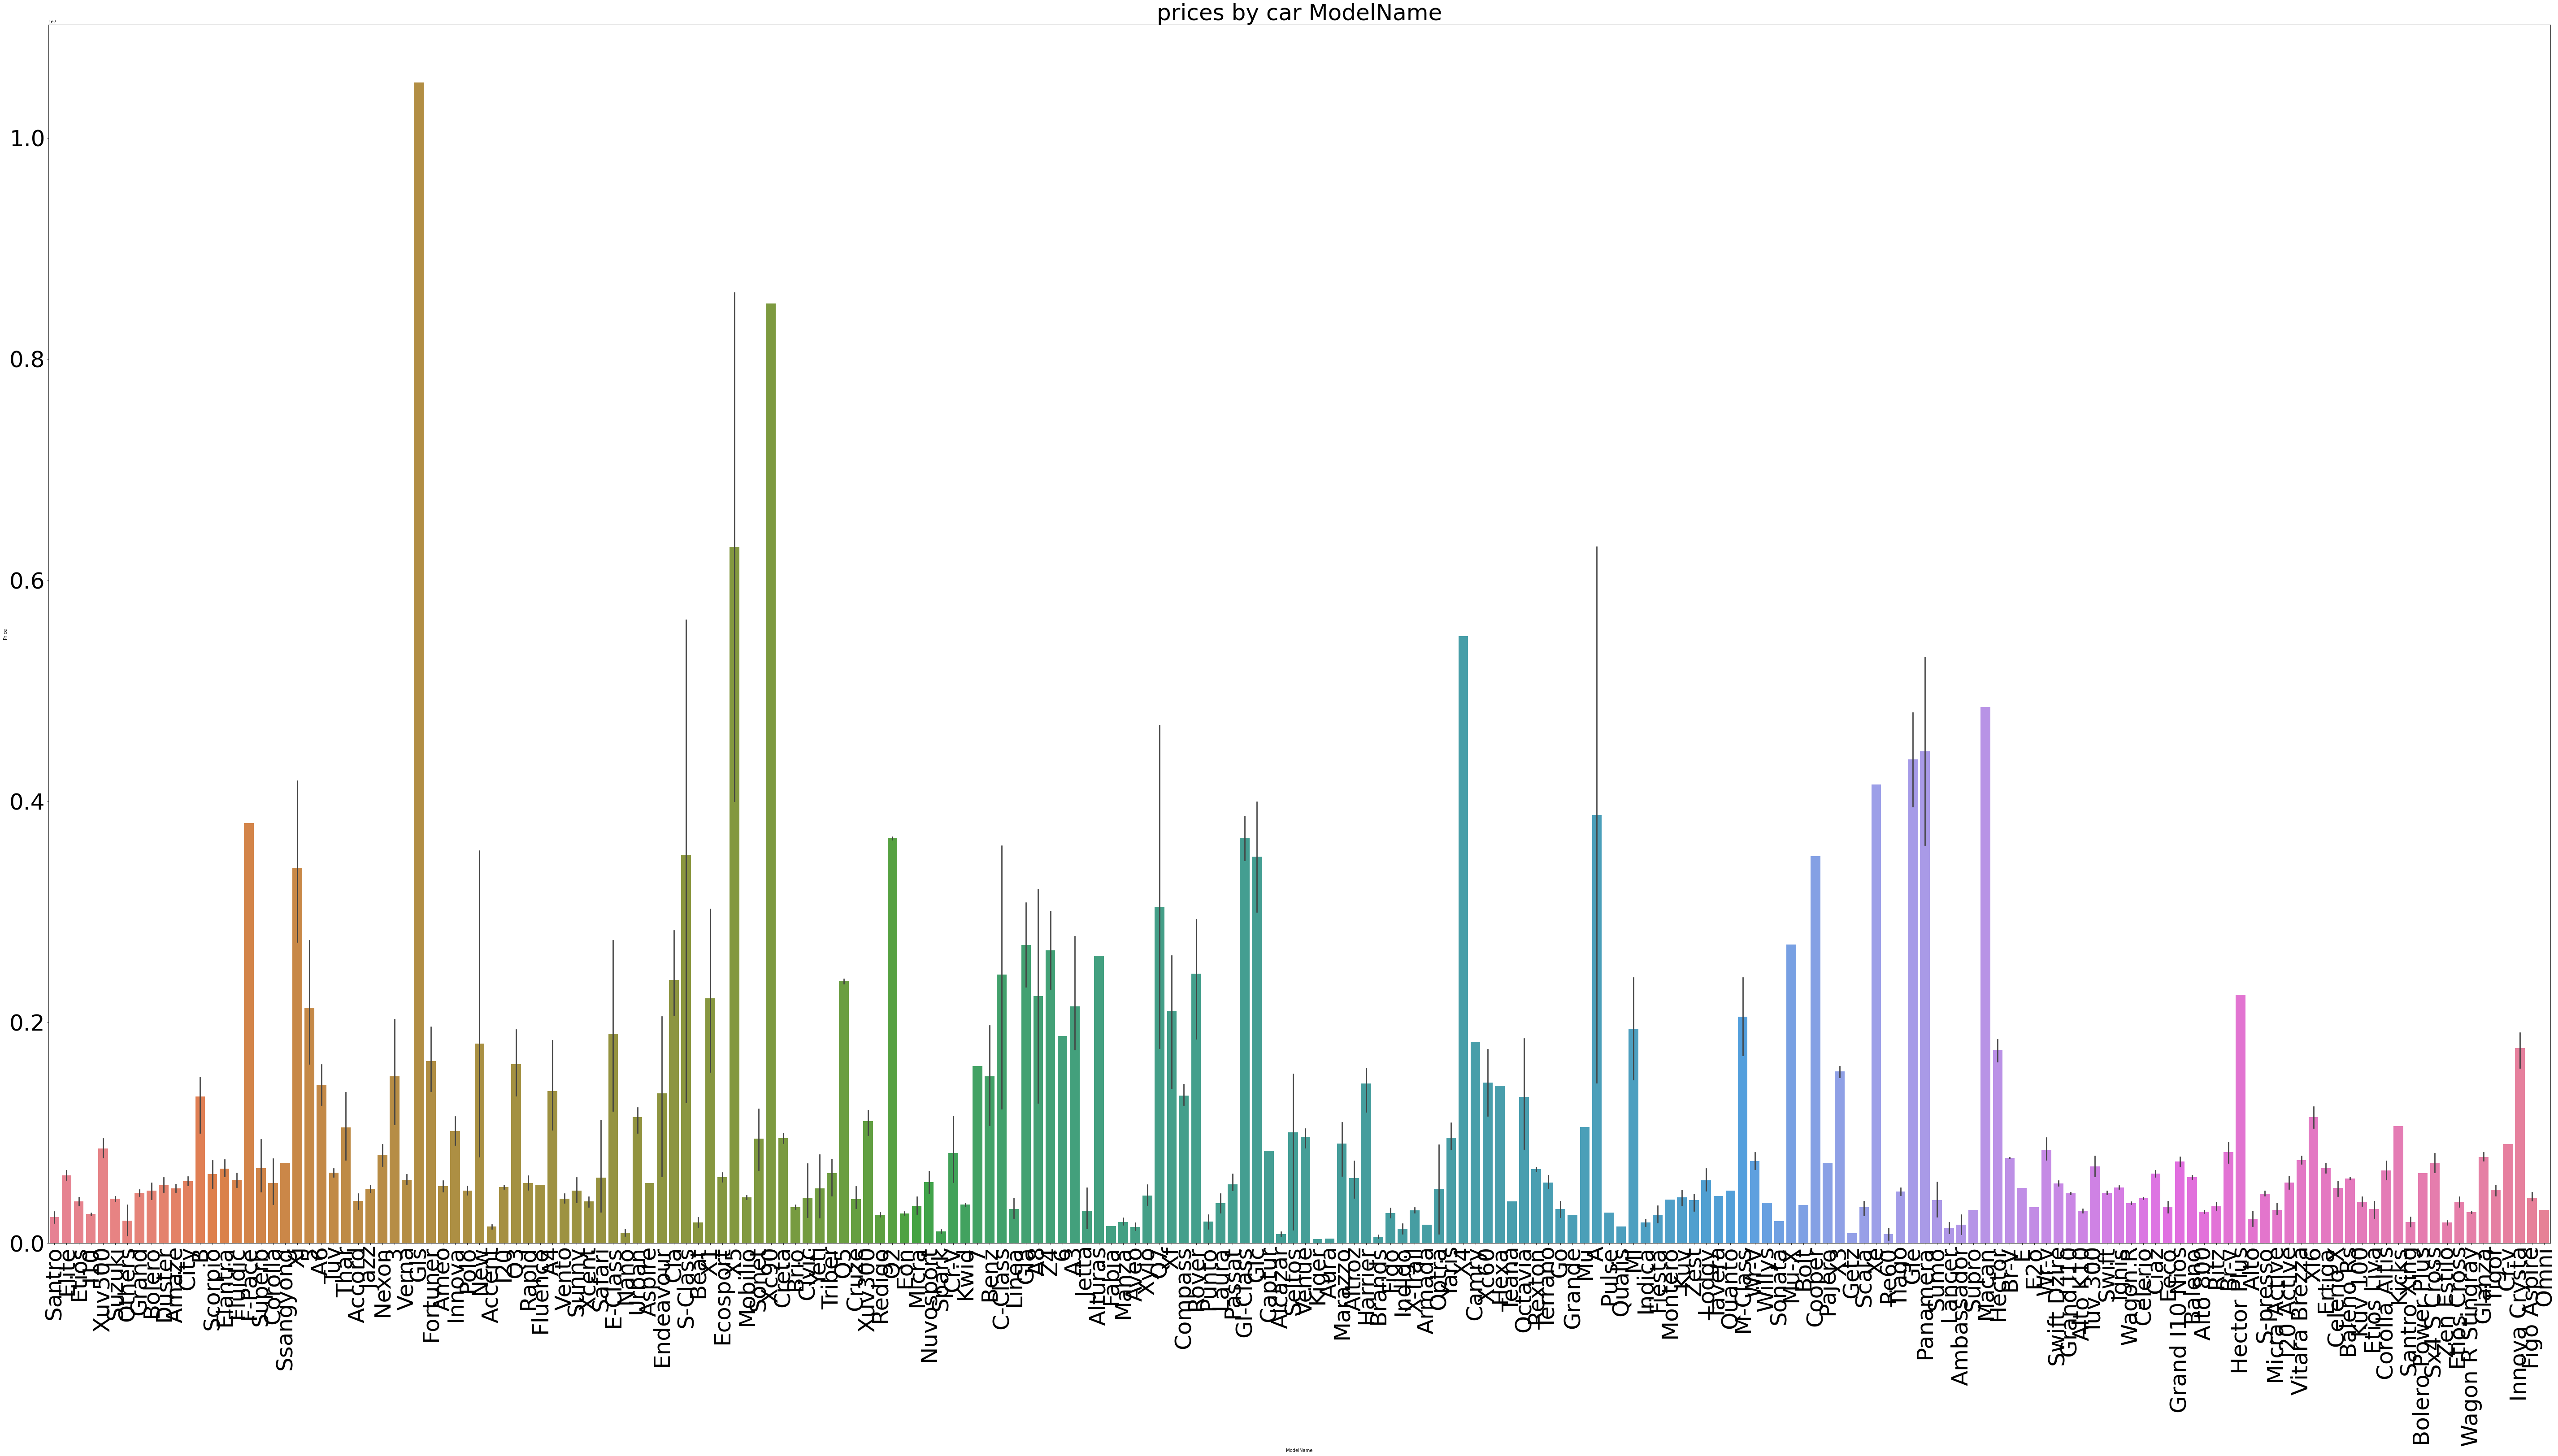

In [90]:
plt.figure(figsize=(100,50))
plt.title("prices by car ModelName", fontsize=50)
sns.barplot(df["ModelName"], df["Price"], data =df, palette="husl")
plt.xticks(rotation=90, fontsize=50)
plt.yticks(fontsize=50) 
plt.show()

* Here we can see all used car modelname with there are price.

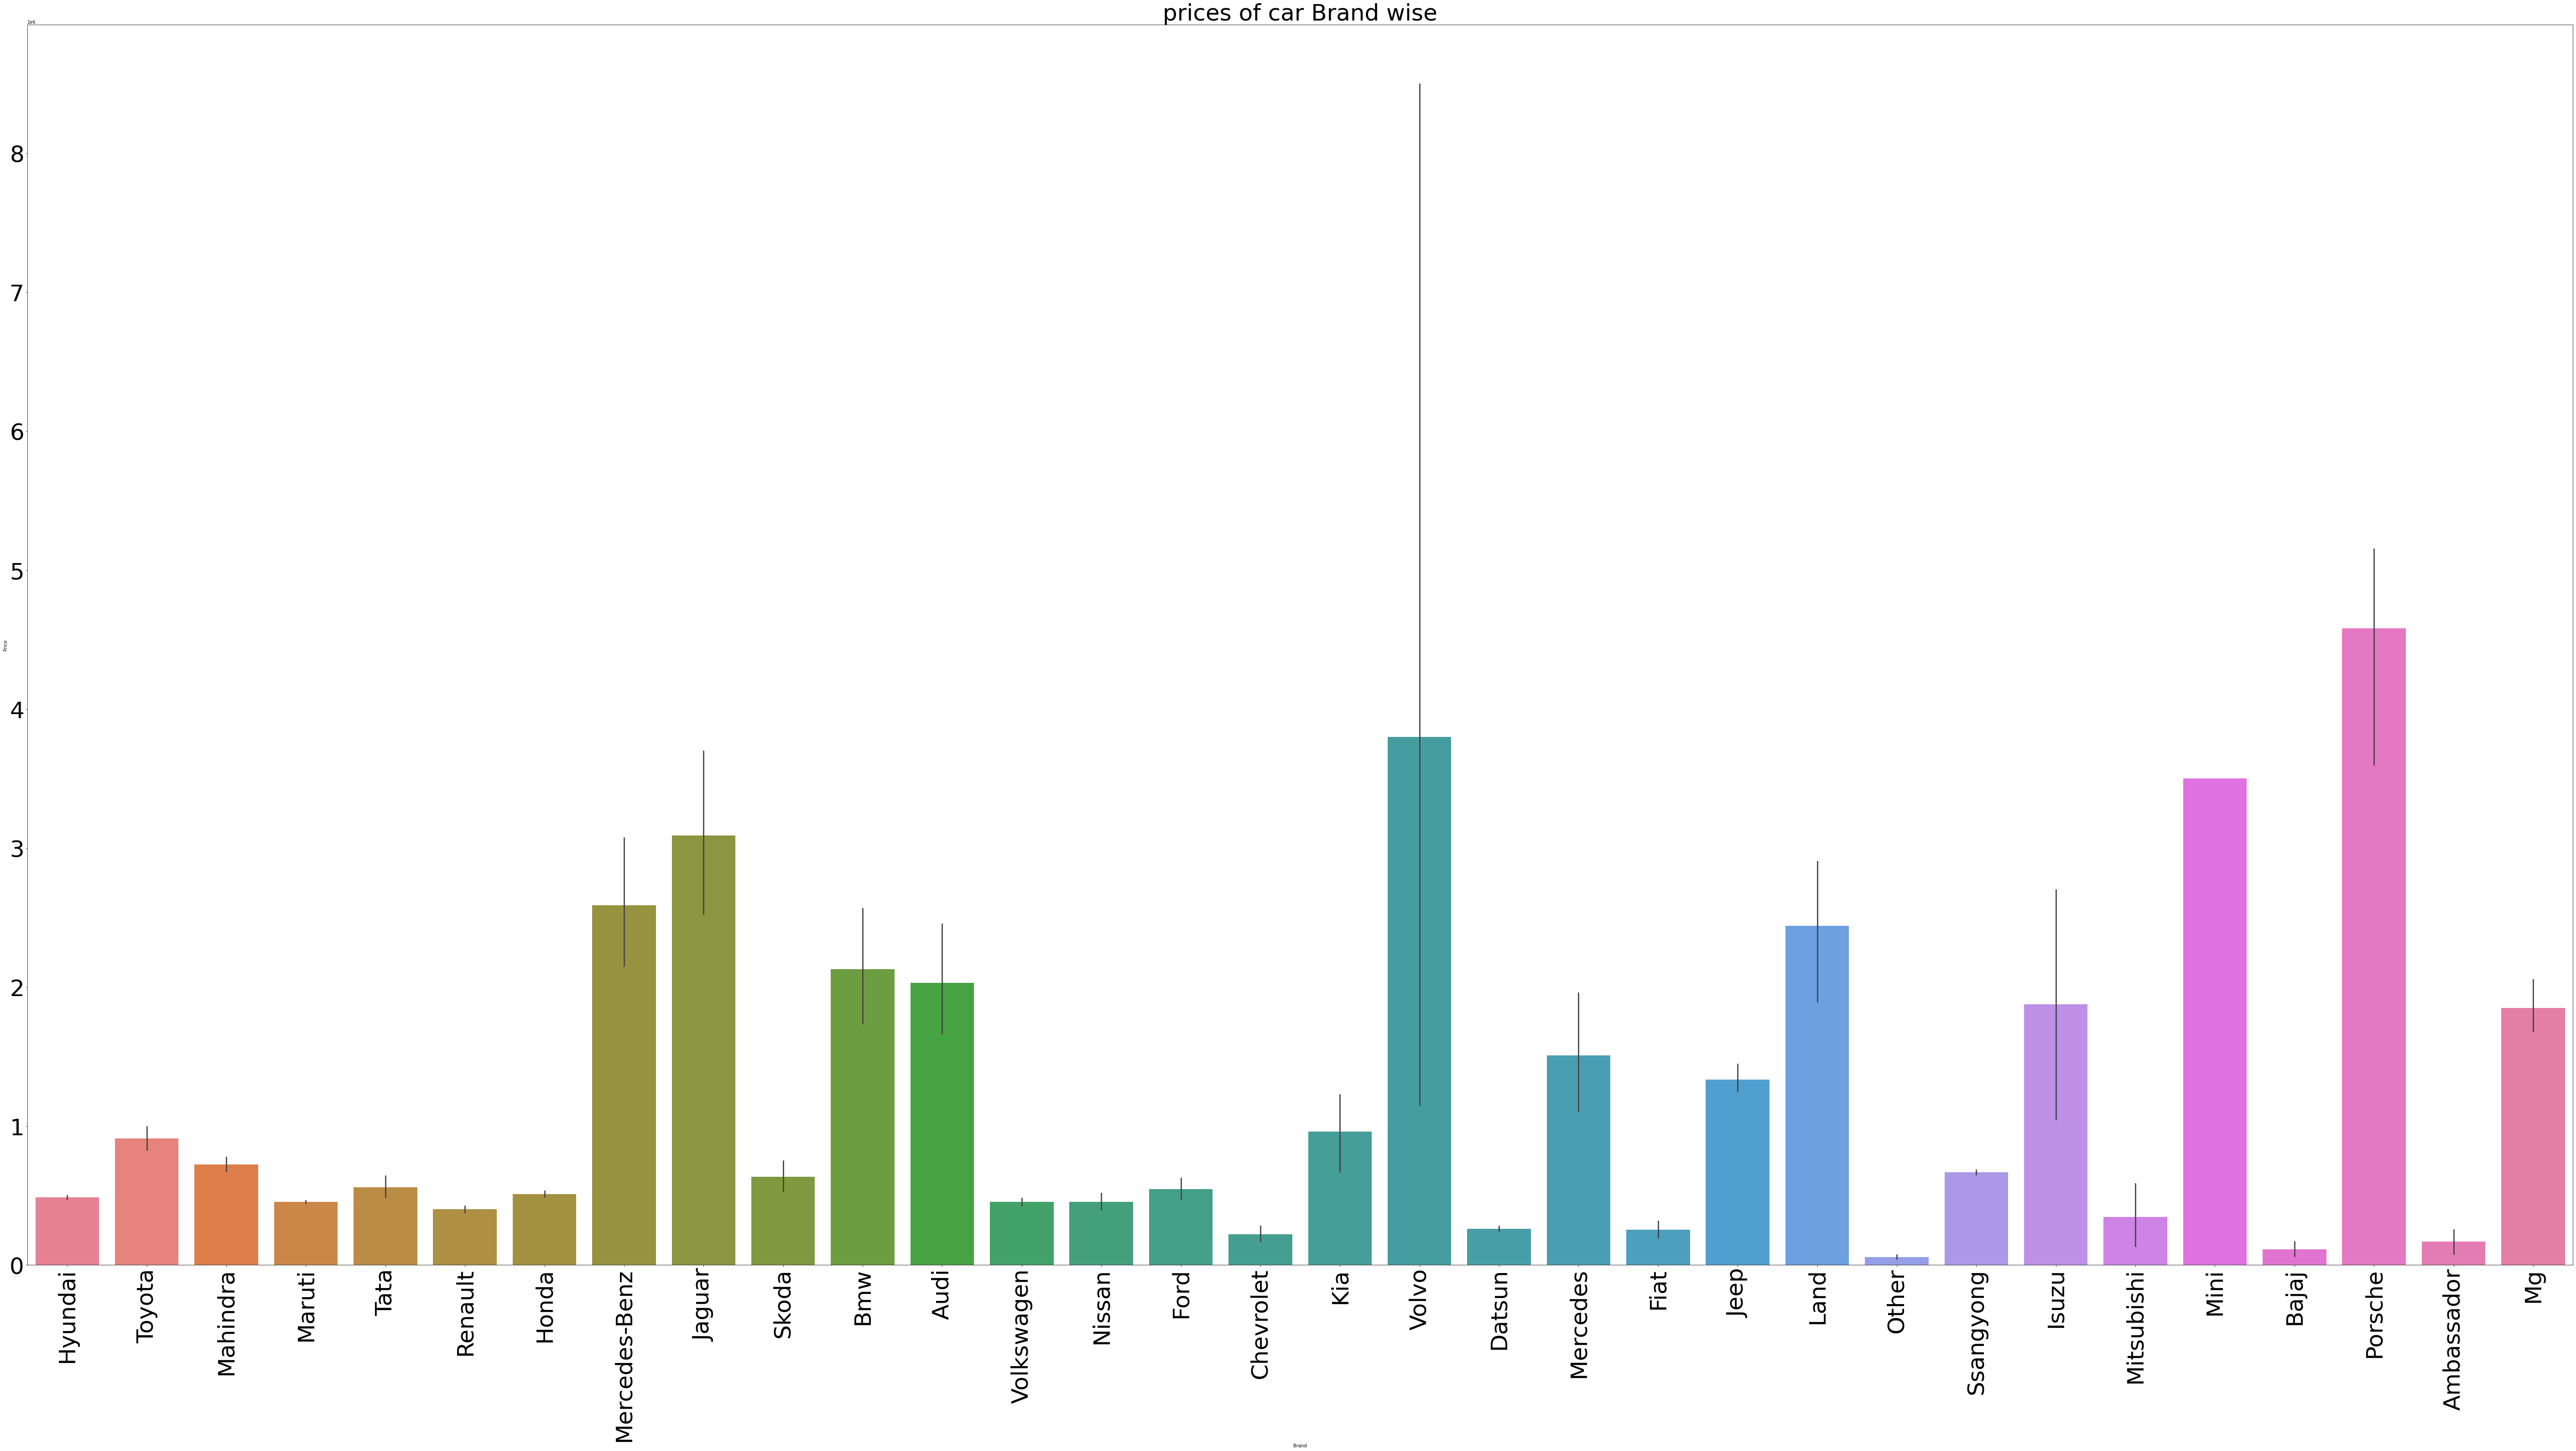

In [91]:
plt.figure(figsize=(100,50))
plt.title("prices of car Brand wise", fontsize=50)
sns.barplot(df["Brand"], df["Price"], data =df, palette="husl")
plt.xticks(rotation=90, fontsize=50)
plt.yticks(fontsize=50)
plt.show()

* Here we can see price of used cars Brand wise, we can clearly see that cars like Porsche is the costliest one followed by Volvo, Mini, Jaguar, Mercedes-Benz, BMW and Audi, after that Indian and chinese brands

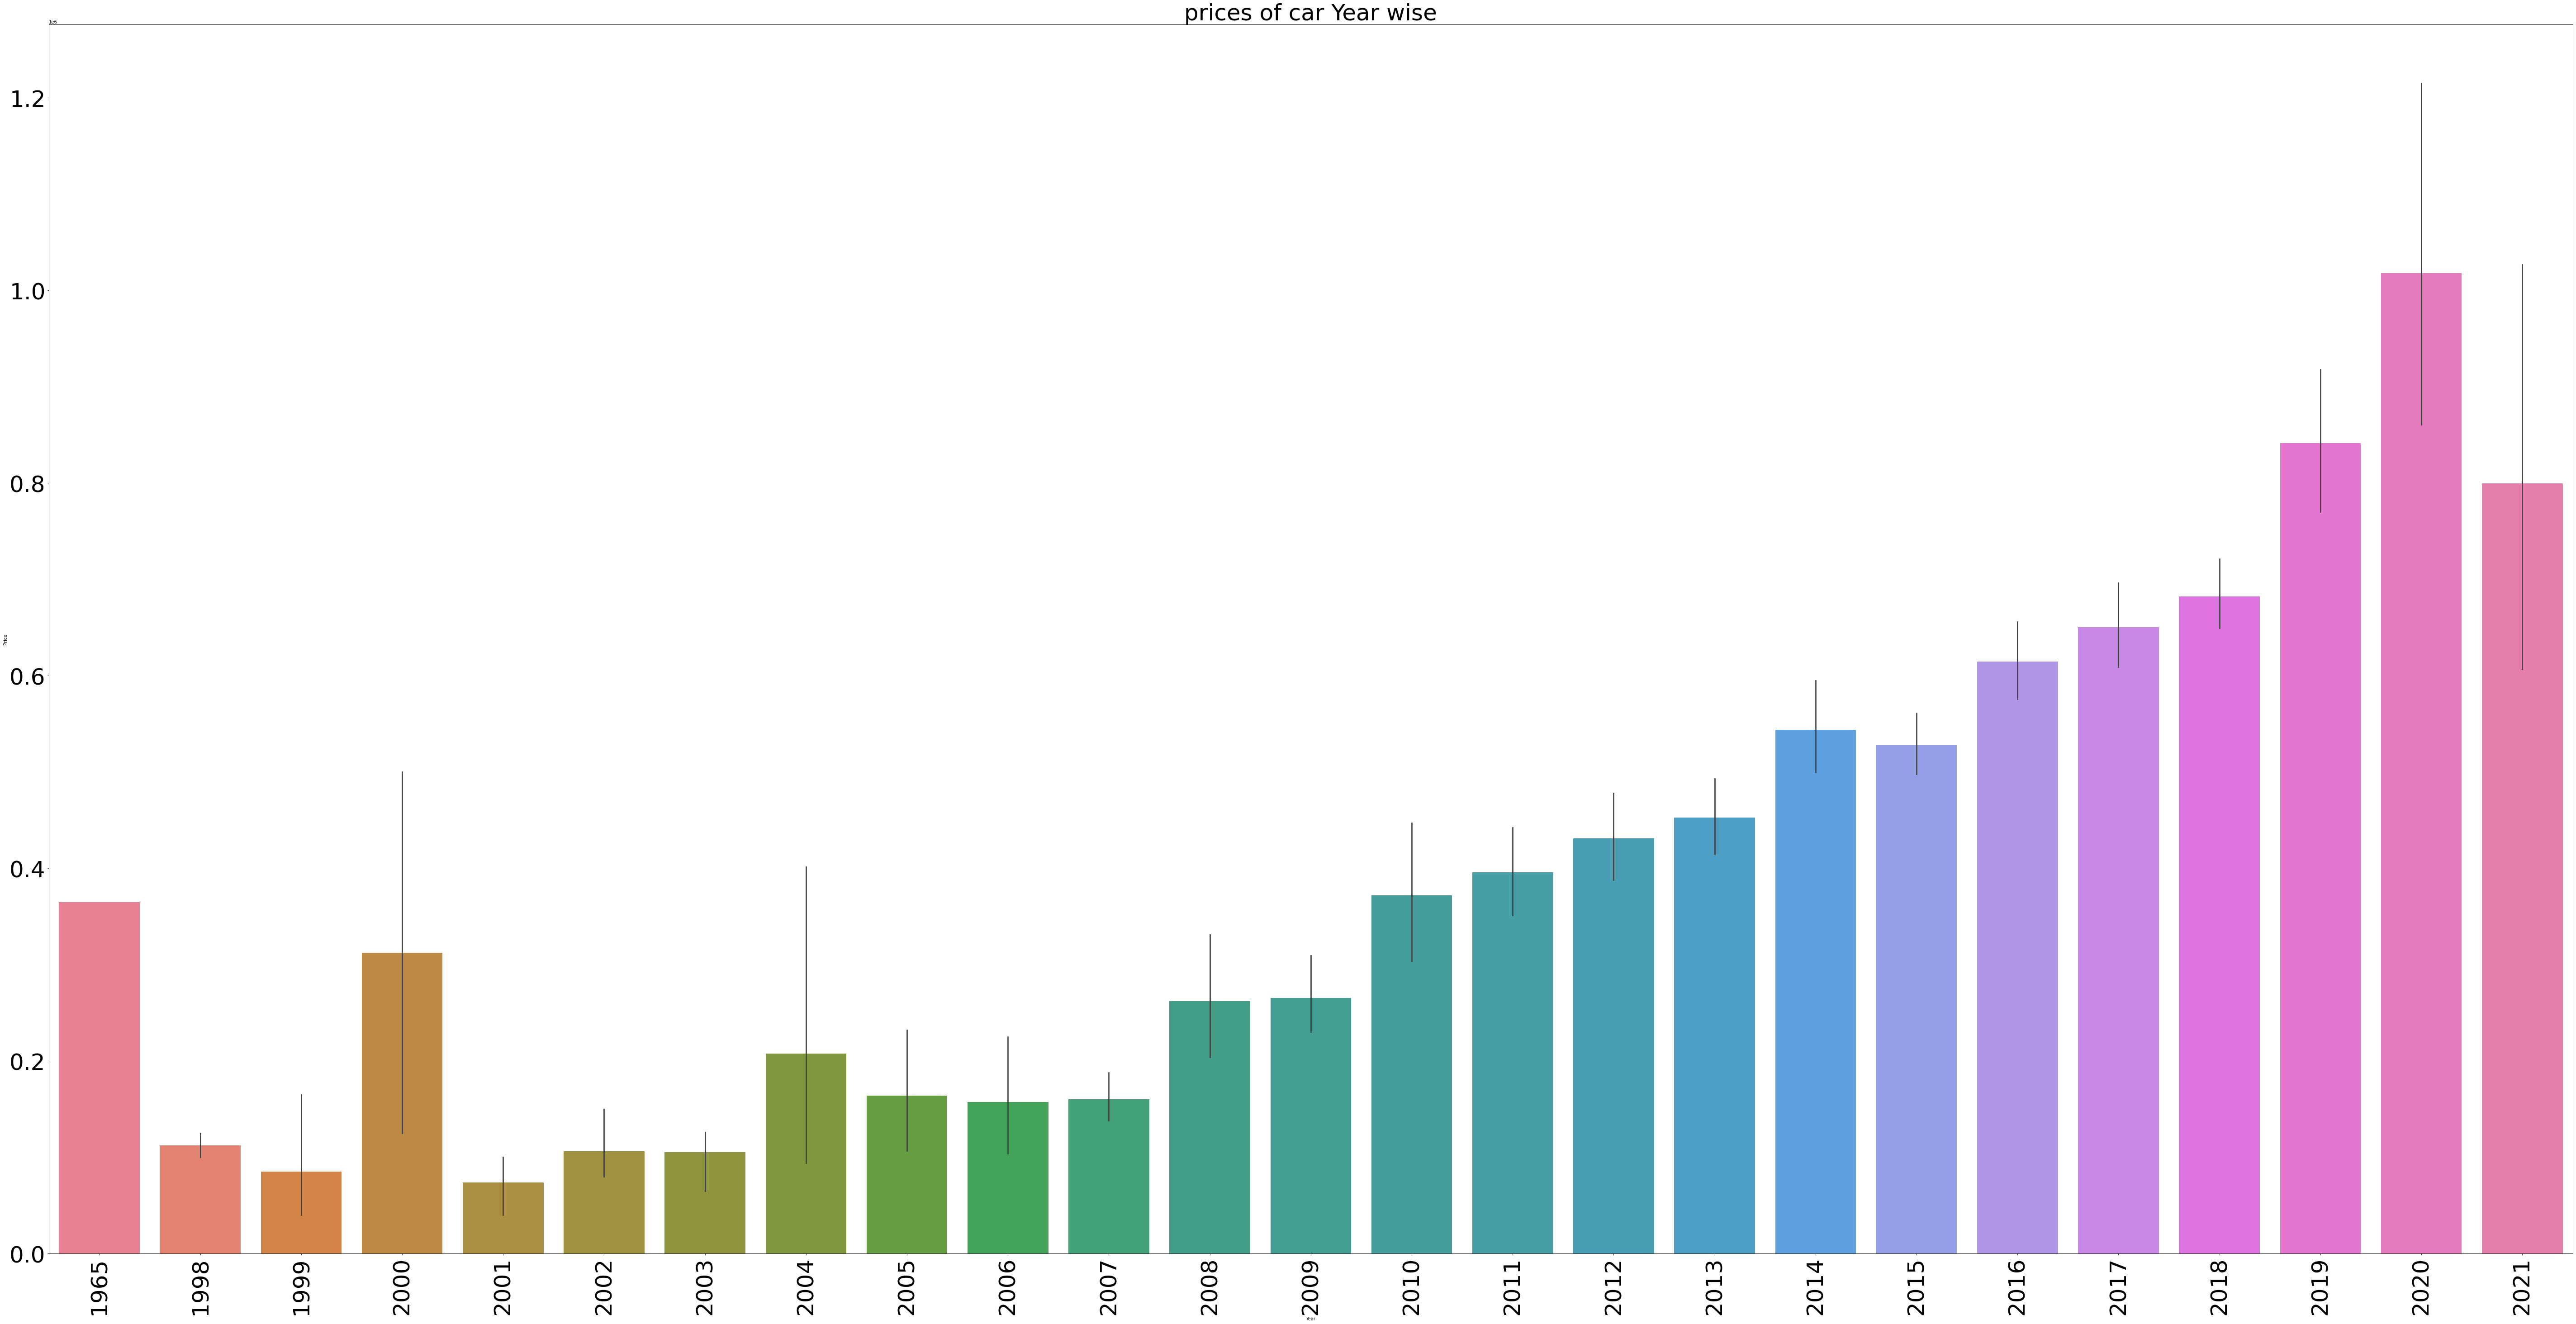

In [92]:
plt.figure(figsize=(100,50))
plt.title("prices of car Year wise", fontsize=50)
sns.barplot(df["Year"], df["Price"], data =df, palette="husl")
plt.xticks(rotation=90, fontsize=50)
plt.yticks(fontsize=50)
plt.show()

* Here we can see the oldest car available for resale was registered in 1965 and the latest in 2021.
* We can clearly see that latest models available are the costliest one's, as they are least driven and as good as new cars.

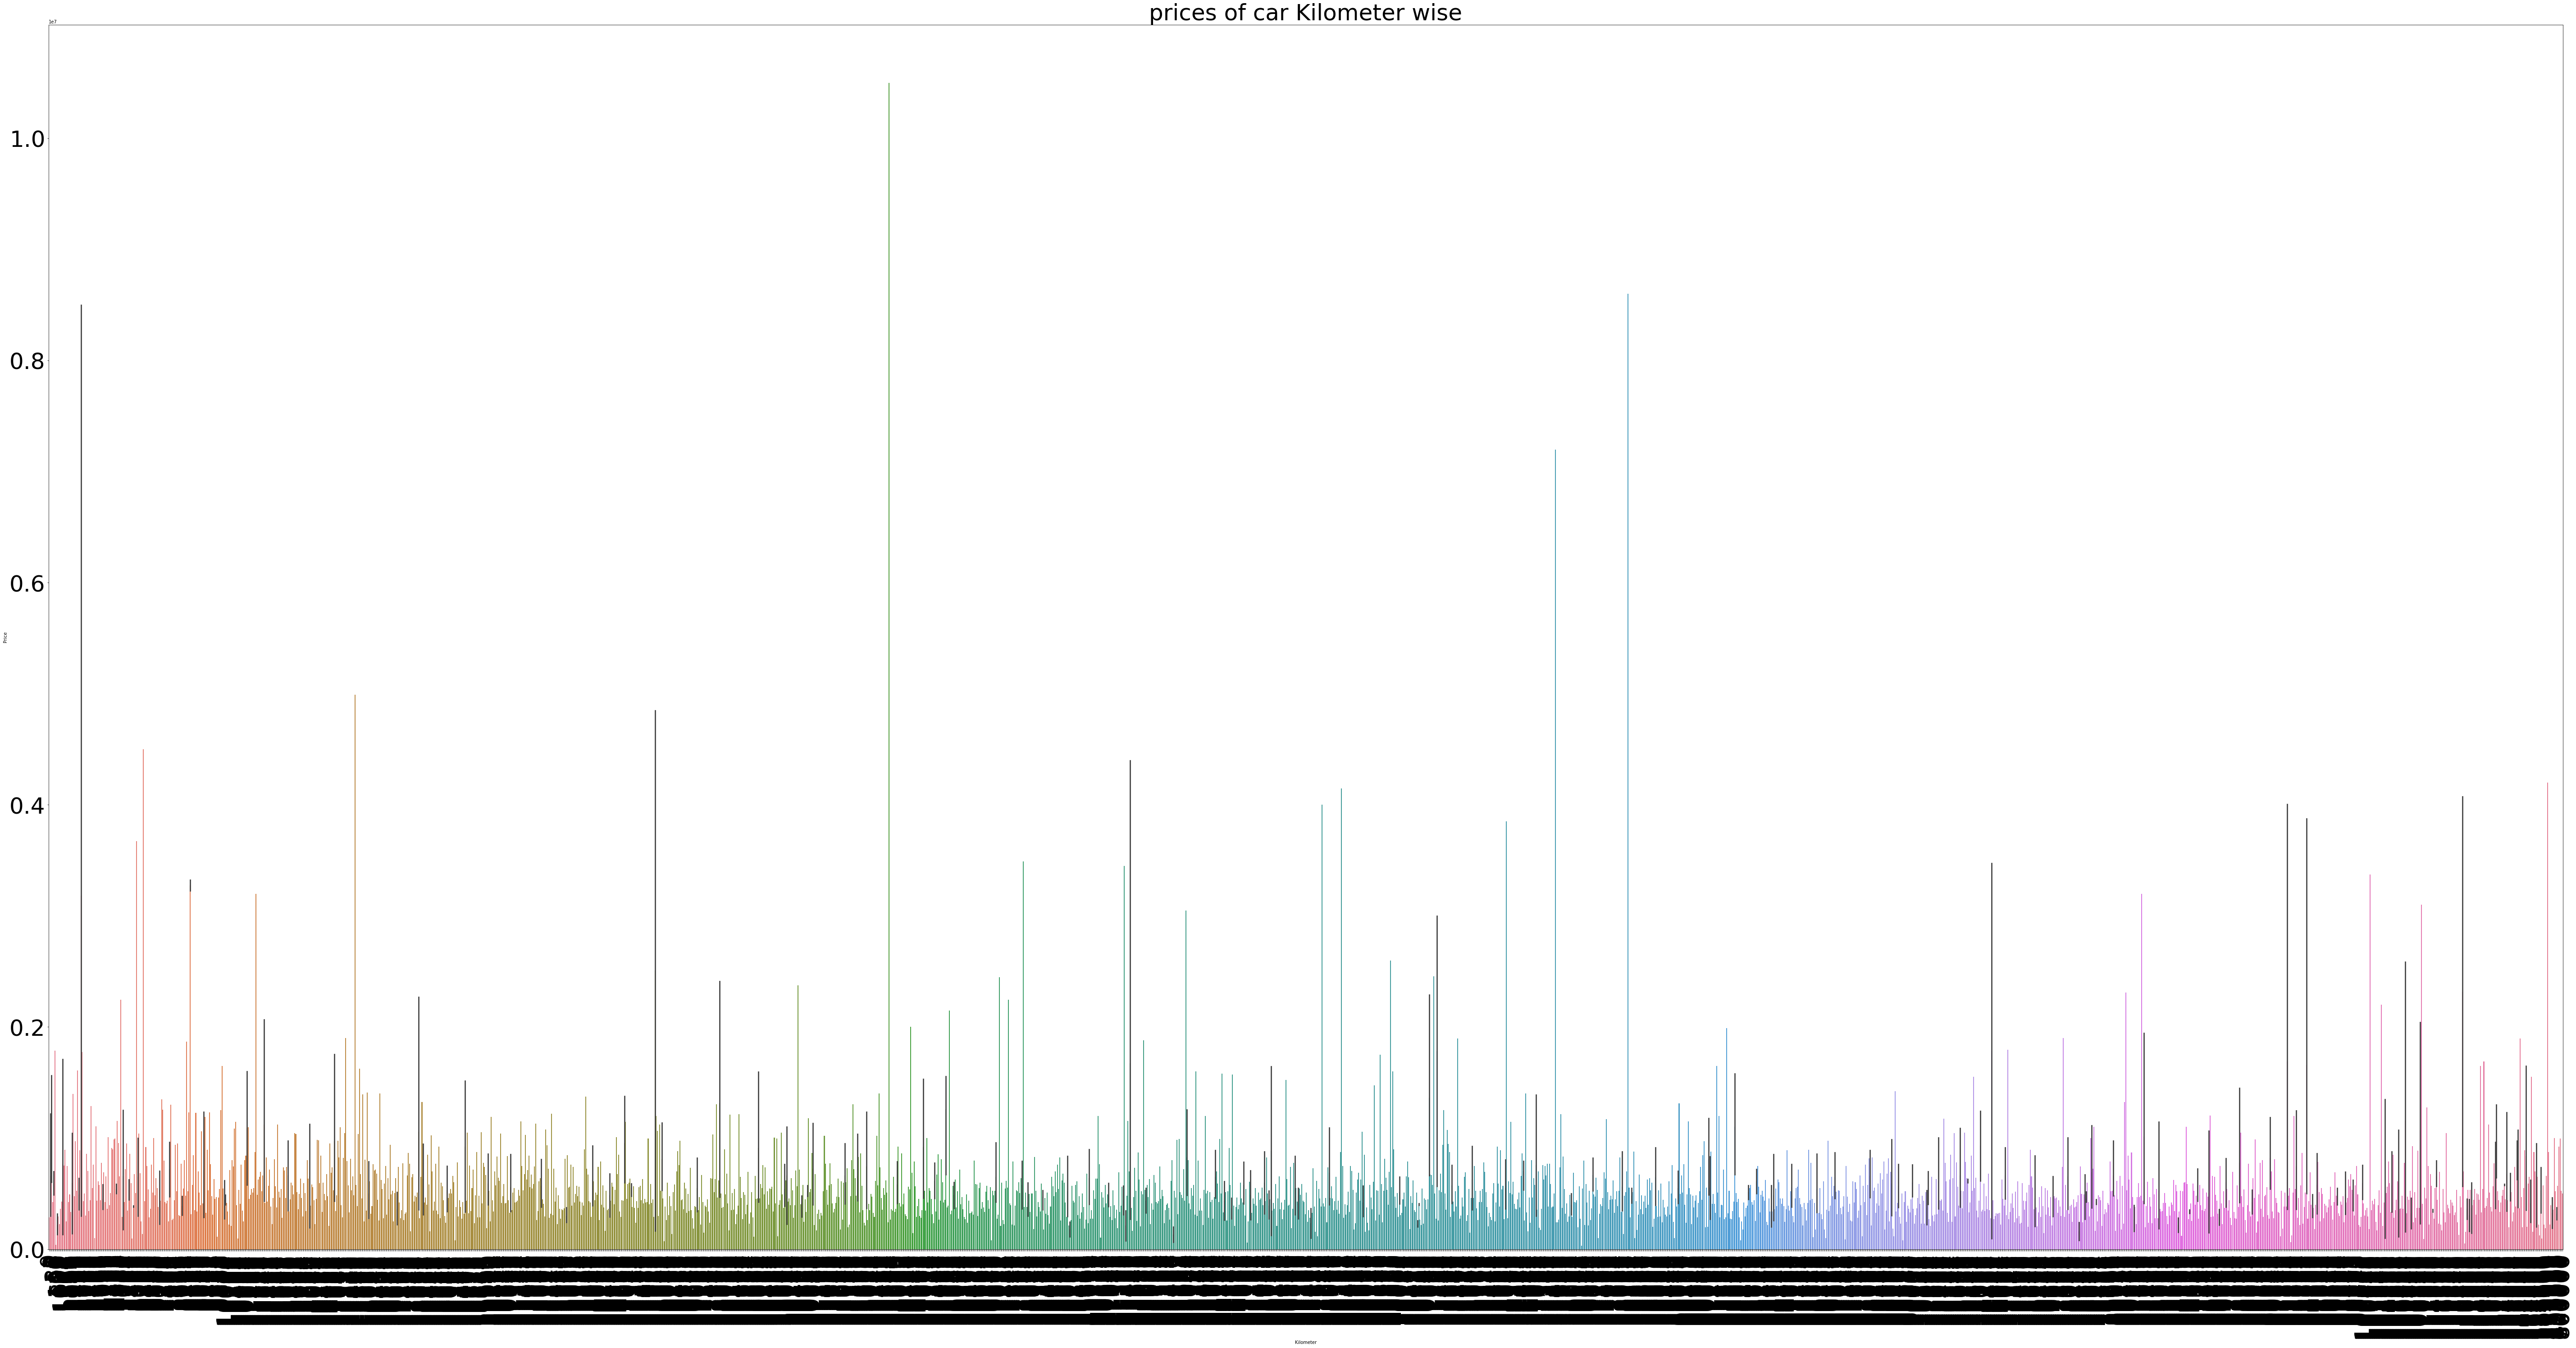

In [93]:
plt.figure(figsize=(100,50))
plt.title("prices of car Kilometer wise", fontsize=50)
sns.barplot(df["Kilometer"], df["Price"], data =df, palette="husl")
plt.xticks(rotation=90, fontsize=50)
plt.yticks(fontsize=50)
plt.show()

* Here we can see the price of cars kilometer wise. the graph is not very clear to make predicitions.

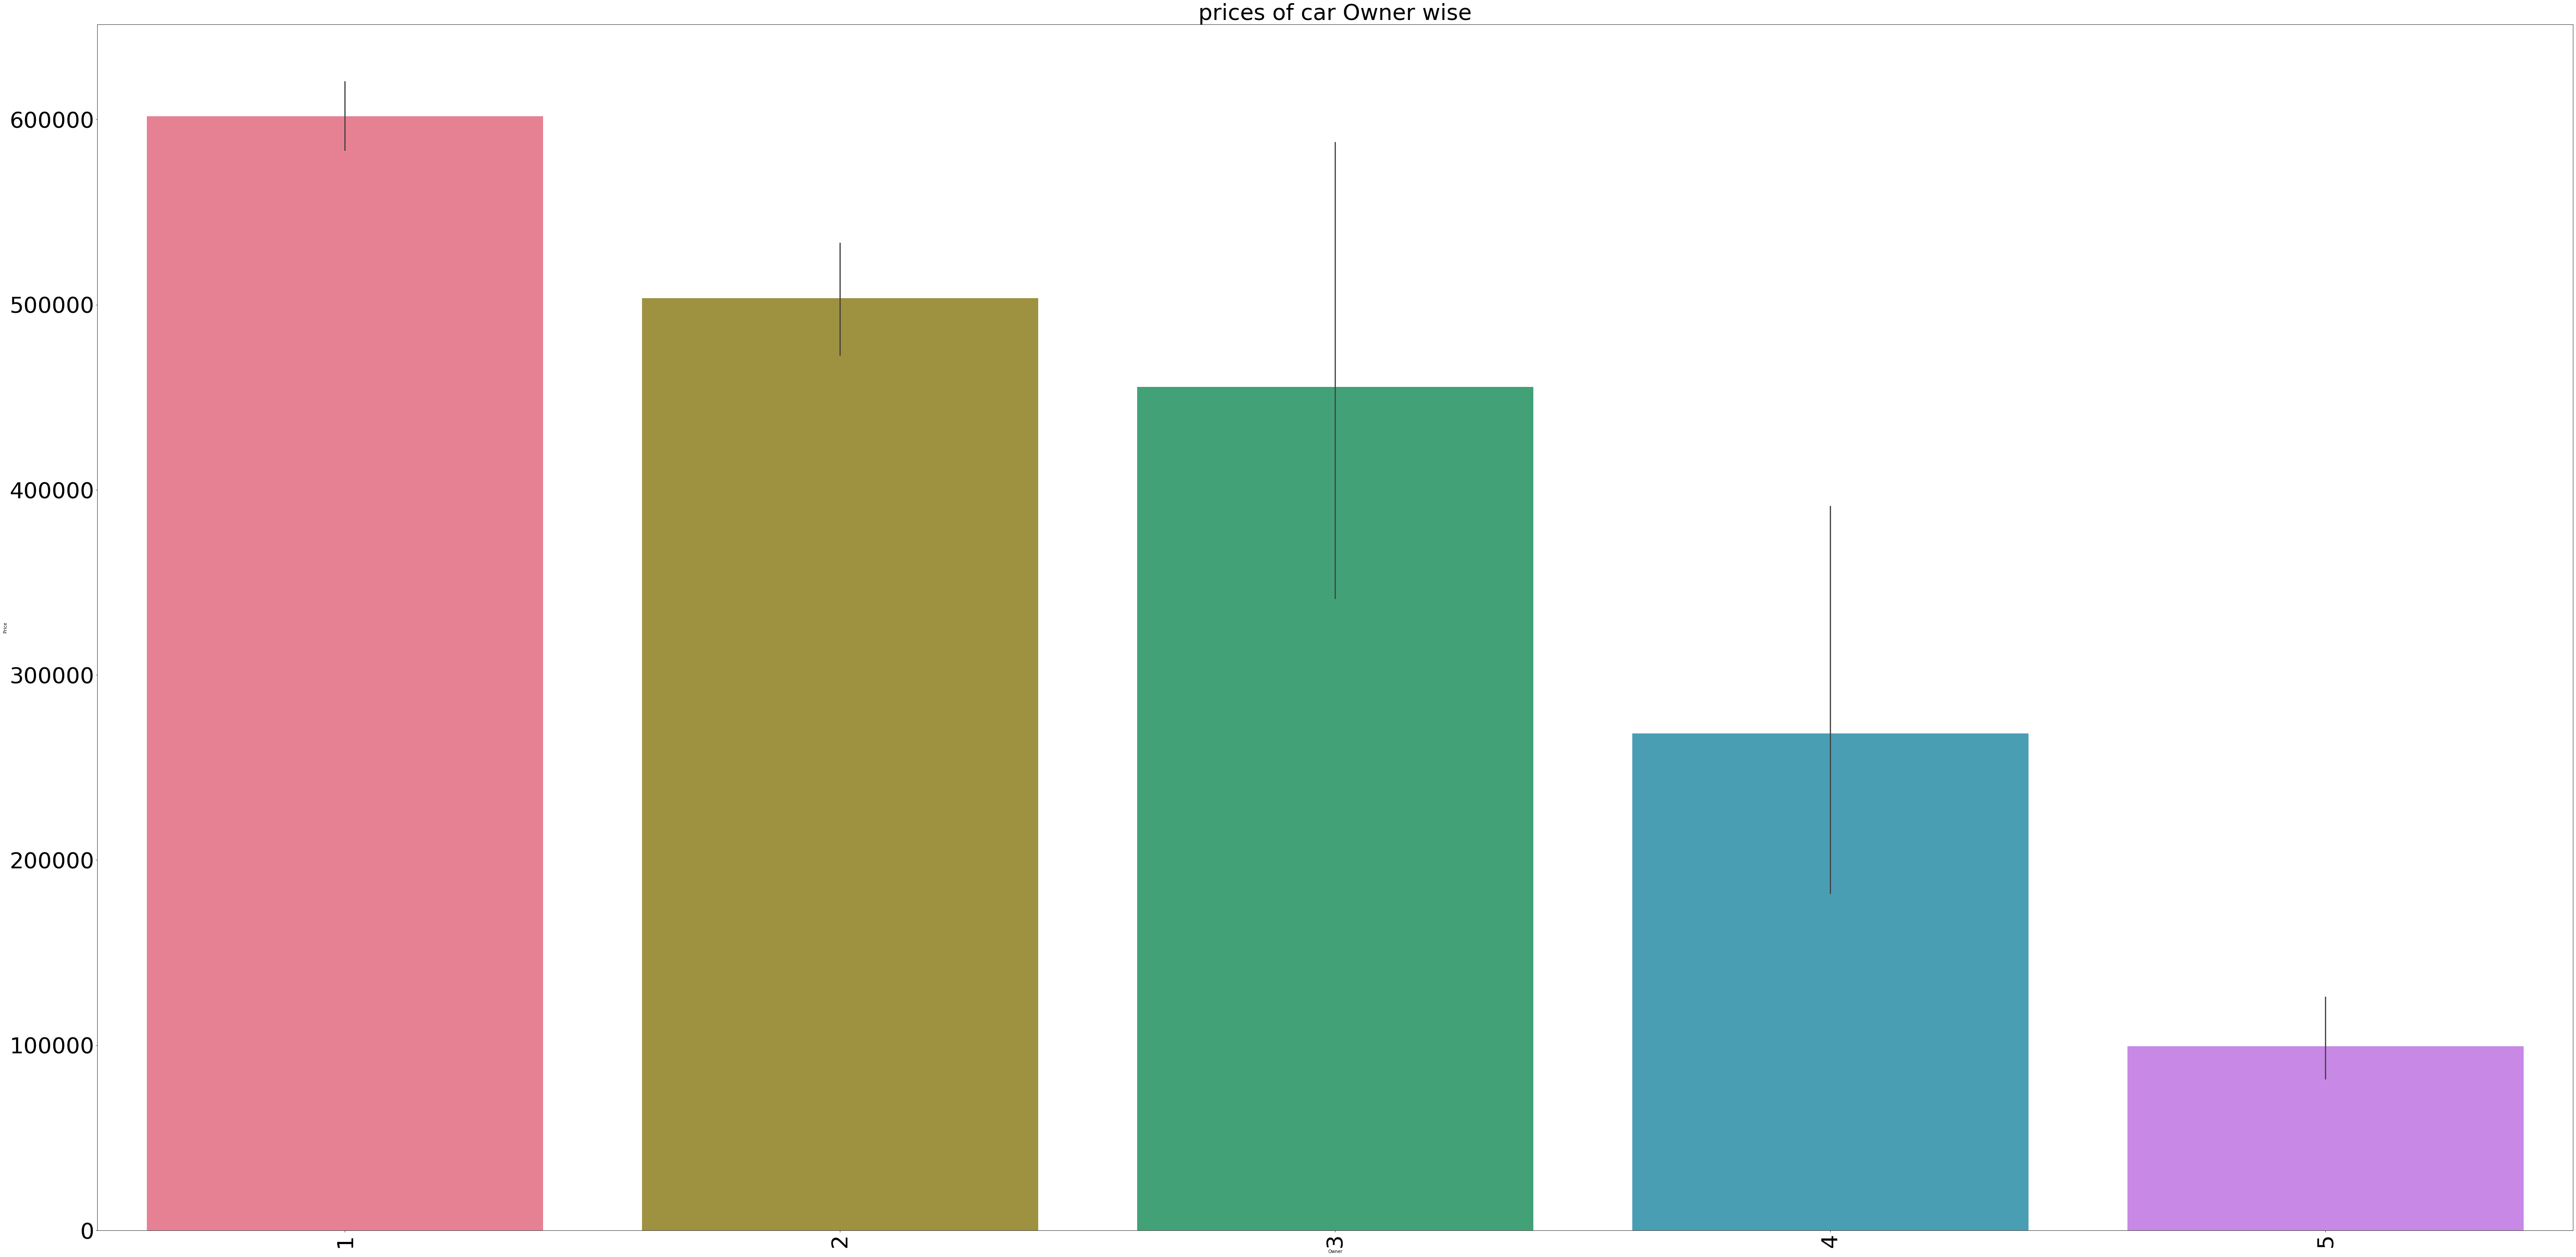

In [95]:
plt.figure(figsize=(100,50))
plt.title("prices of car Owner wise", fontsize=50)
sns.barplot(df["Owner"], df["Price"], data =df, palette="husl")
plt.xticks(rotation=90, fontsize=50)
plt.yticks(fontsize=50)
plt.show()

* Here we can clearly see that 1st Owner cars gets the best resale value in the market, as compared to 2nd or 3rd owner, one reason could be that 2nd or 3rd owner cars must be older as compared to 1st owner.

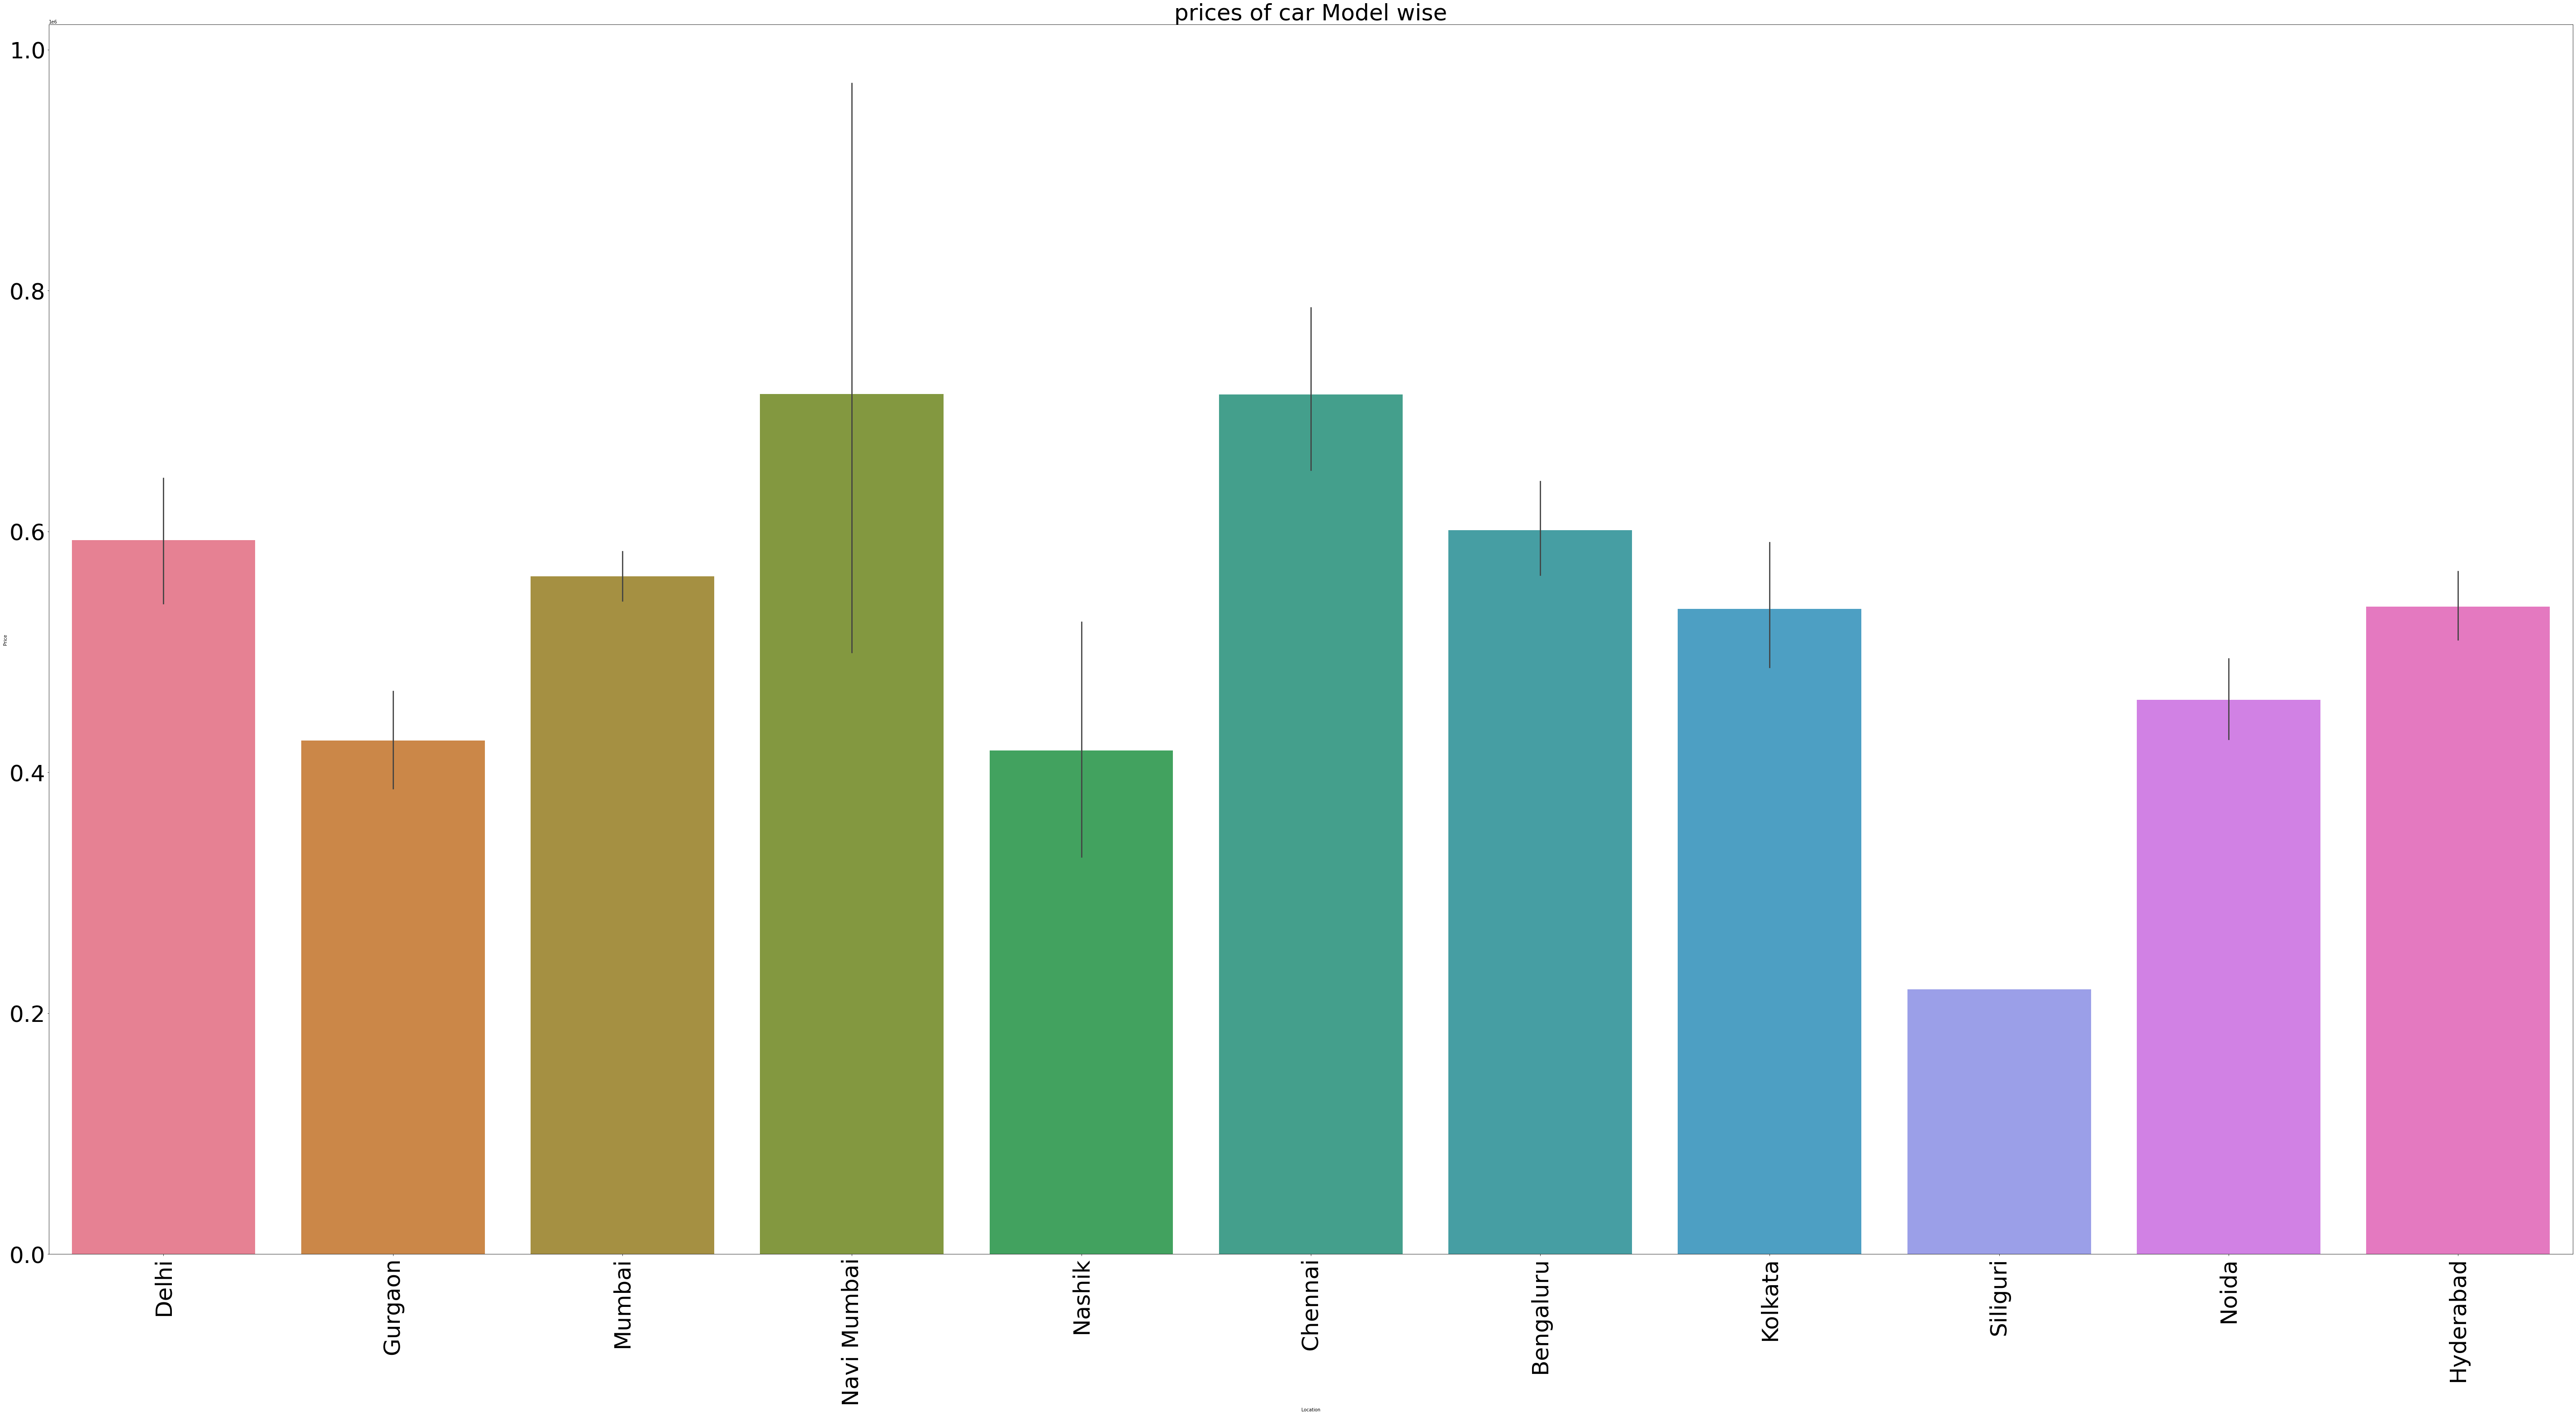

In [97]:
plt.figure(figsize=(100,50))
plt.title("prices of car Model wise", fontsize=50)
sns.barplot(df["Location"], df["Price"], data =df, palette="husl")
plt.xticks(rotation=90, fontsize=50)
plt.yticks(fontsize=50)
plt.show()

* Here we can clearly see that used cars in Navi Mumbai and Chennai are the costliest as per available data, followed by Bengaluru and Delhi.

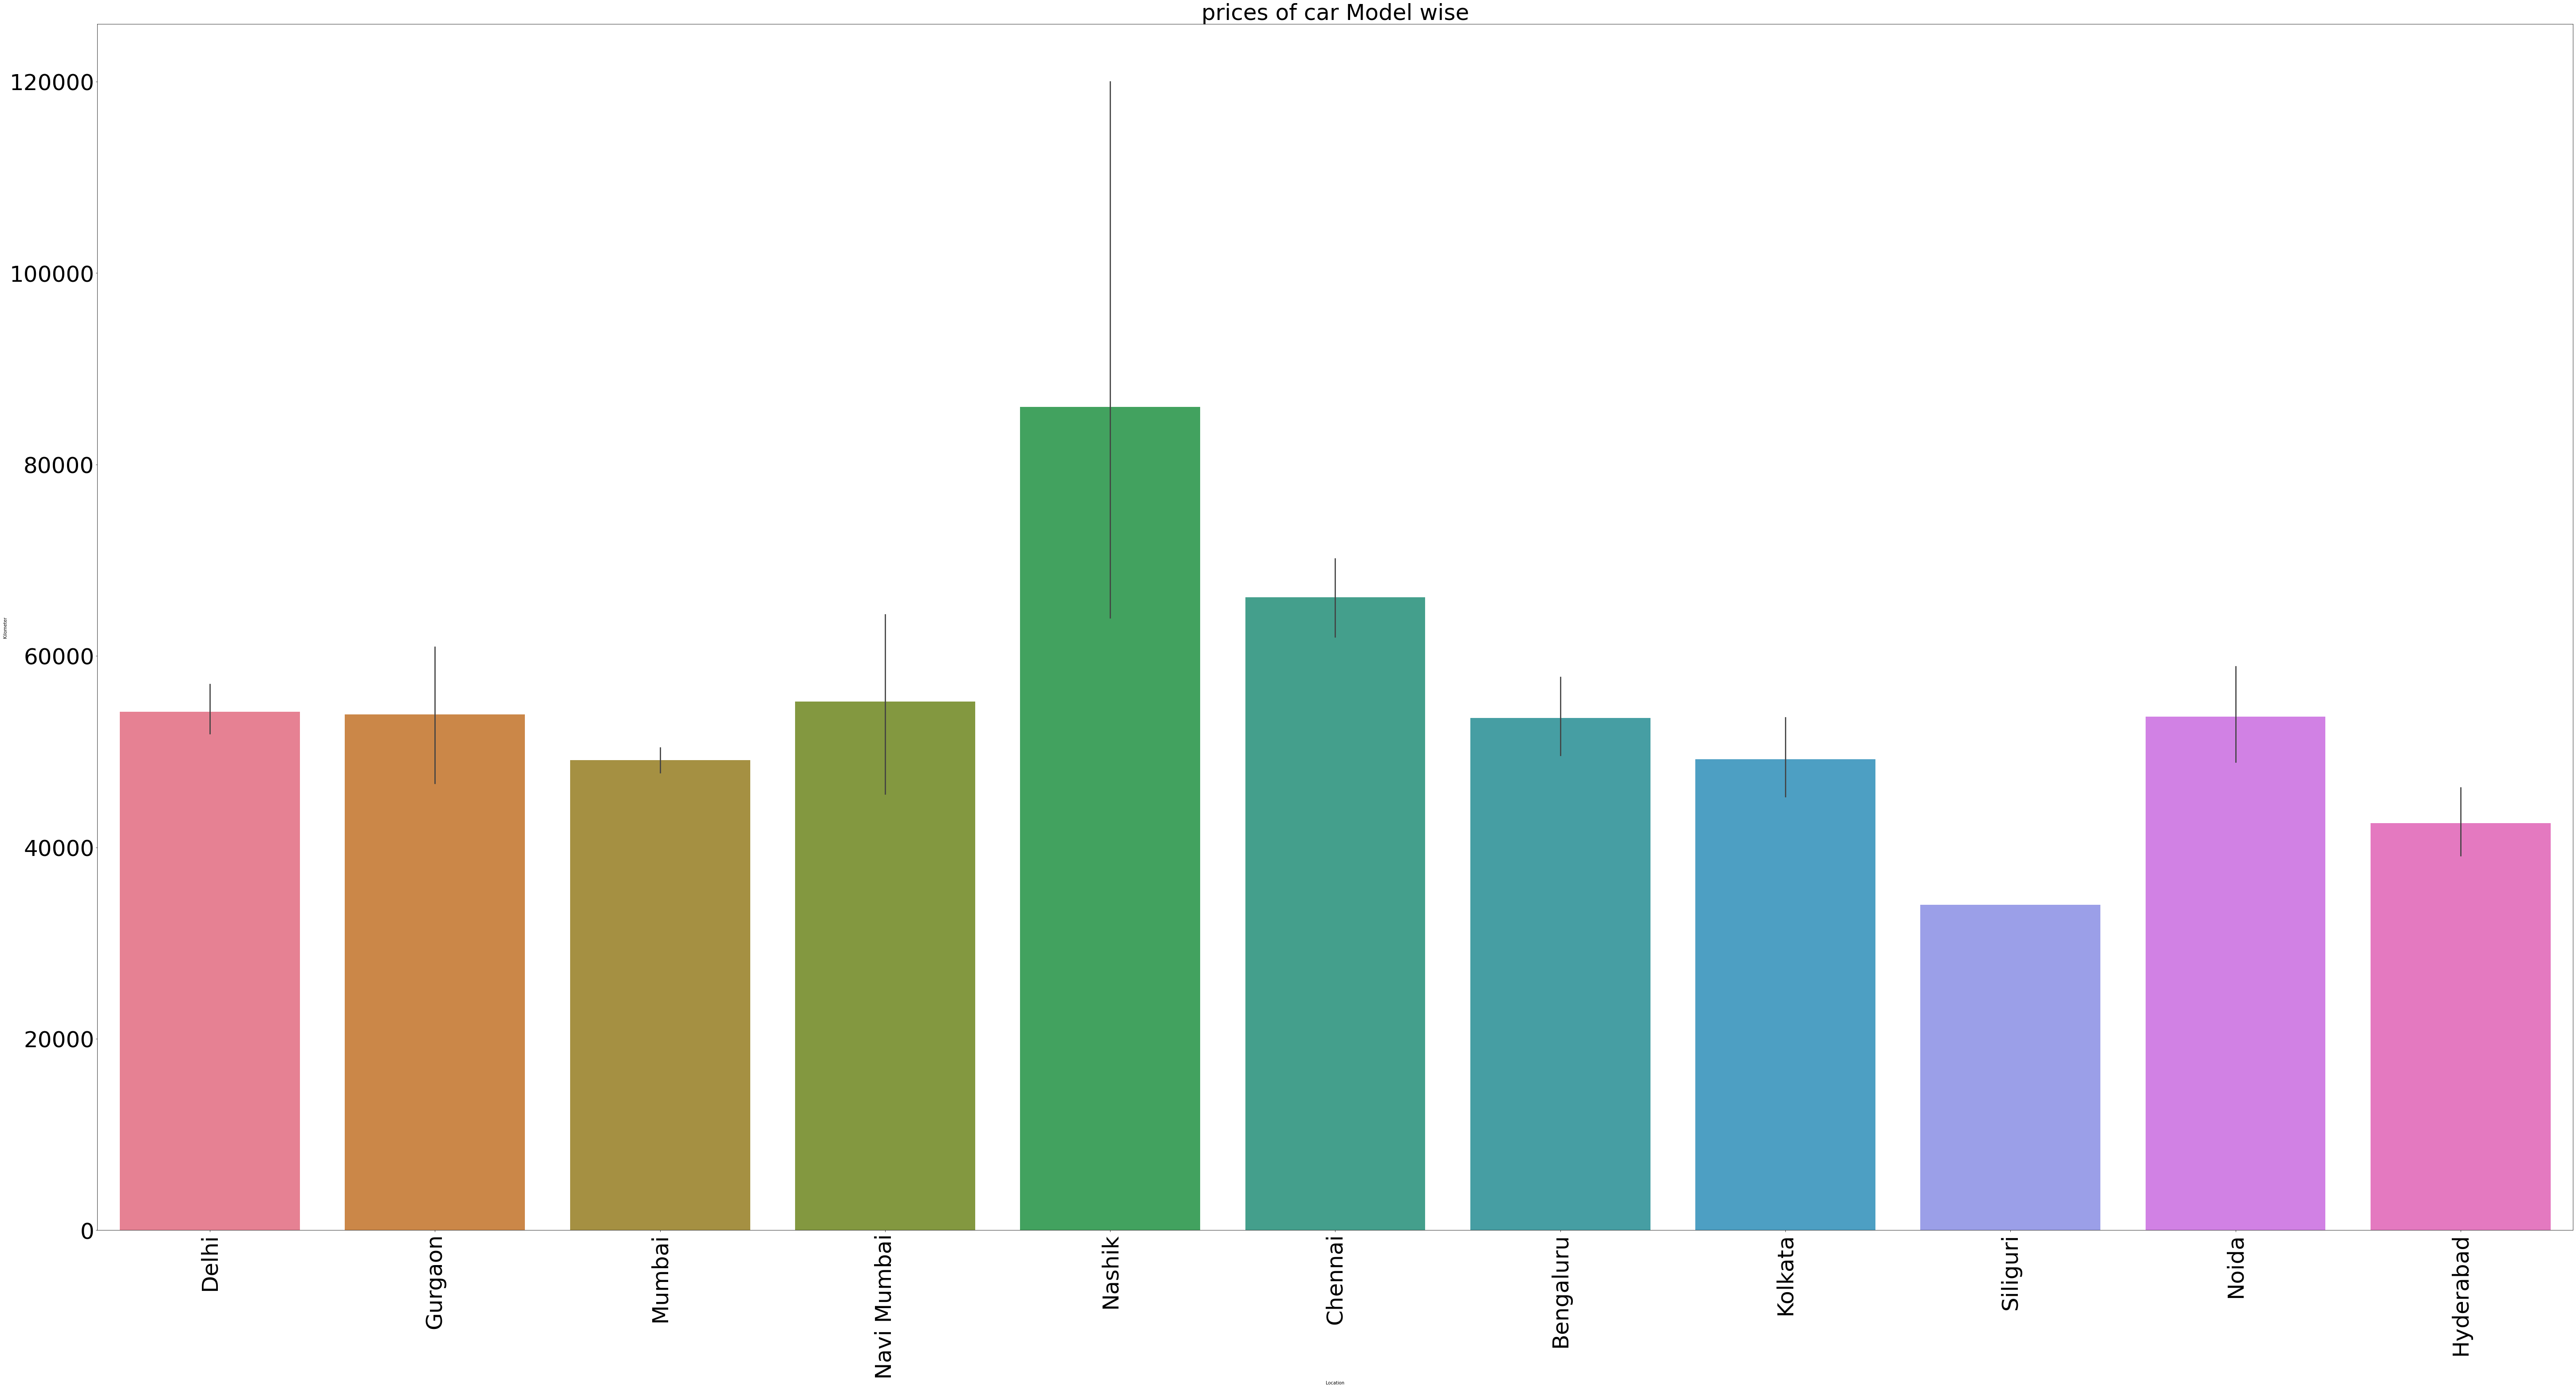

In [100]:
plt.figure(figsize=(100,50))
plt.title("prices of car Model wise", fontsize=50)
sns.barplot(df["Location"], df["Kilometer"], data =df, palette="husl")
plt.xticks(rotation=90, fontsize=50)
plt.yticks(fontsize=50)
plt.show()

* Here we can clearly see that Cars in Nashik are driven the most as compared to big cities, this may be because, very less no. of cars from Nashik are available for resale in our Scrapped Data.

# MultiVariate Analysis:

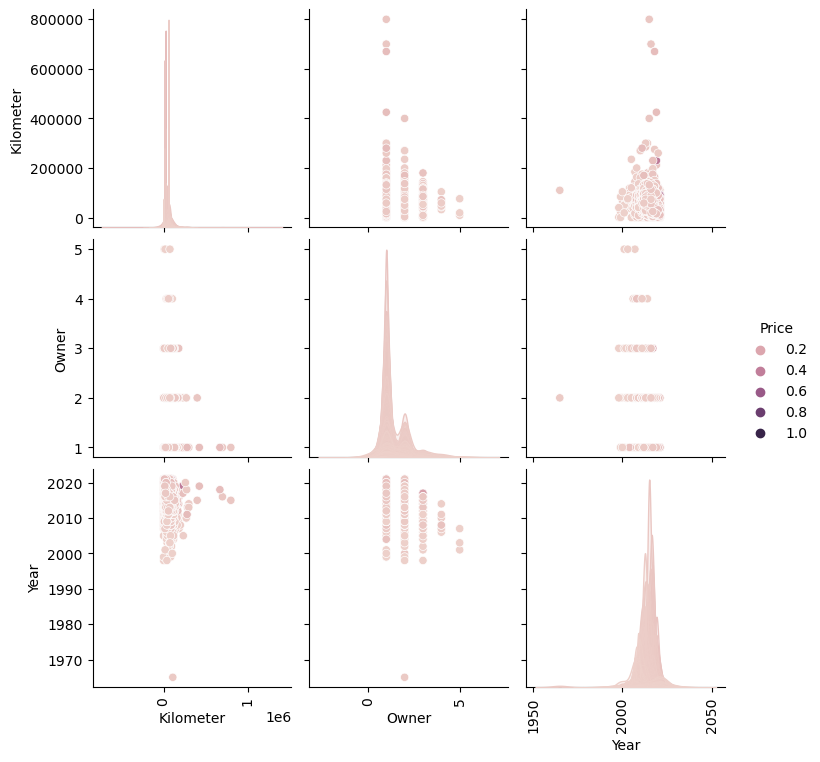

In [101]:
# Lets Visualize relationship among all the columns in the dataset using Pairplot
plt.style.use('default')
a=sns.pairplot(df, hue='Price',diag_kind='kde')
for ax in a.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

* Here in the pairplot we can see the different pair of features. we can also notice some outliers in some of the columns.

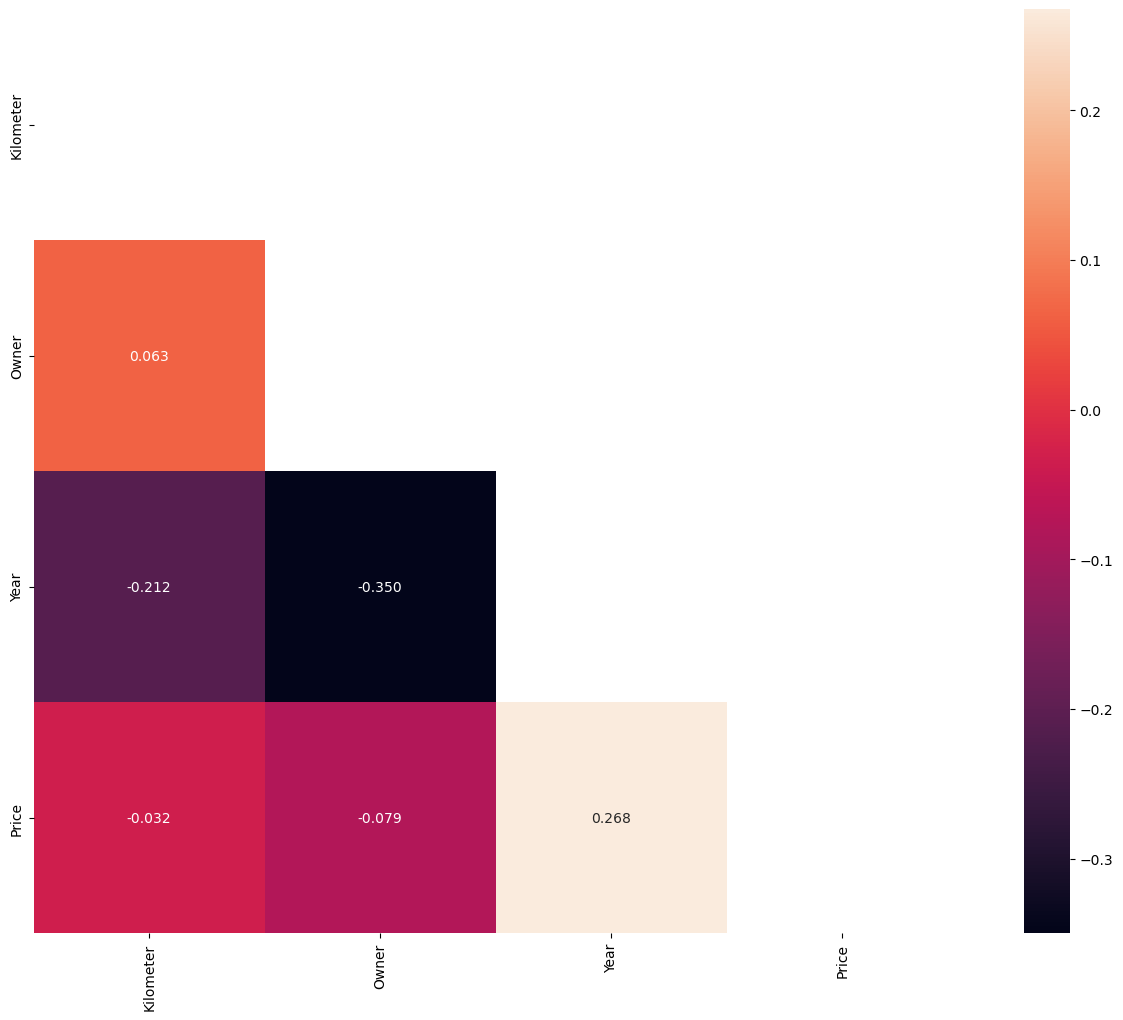

In [102]:
# lets see correlation between all the columns using the heatmap
tri=np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), annot=True, square= True, fmt='0.3f', mask=tri)
plt.xticks(rotation=90)
plt.show()

* Here we can see negative strong relationship between owner and year.
* we can also see good relation between price and year as well.

# Outliers:

<AxesSubplot:>

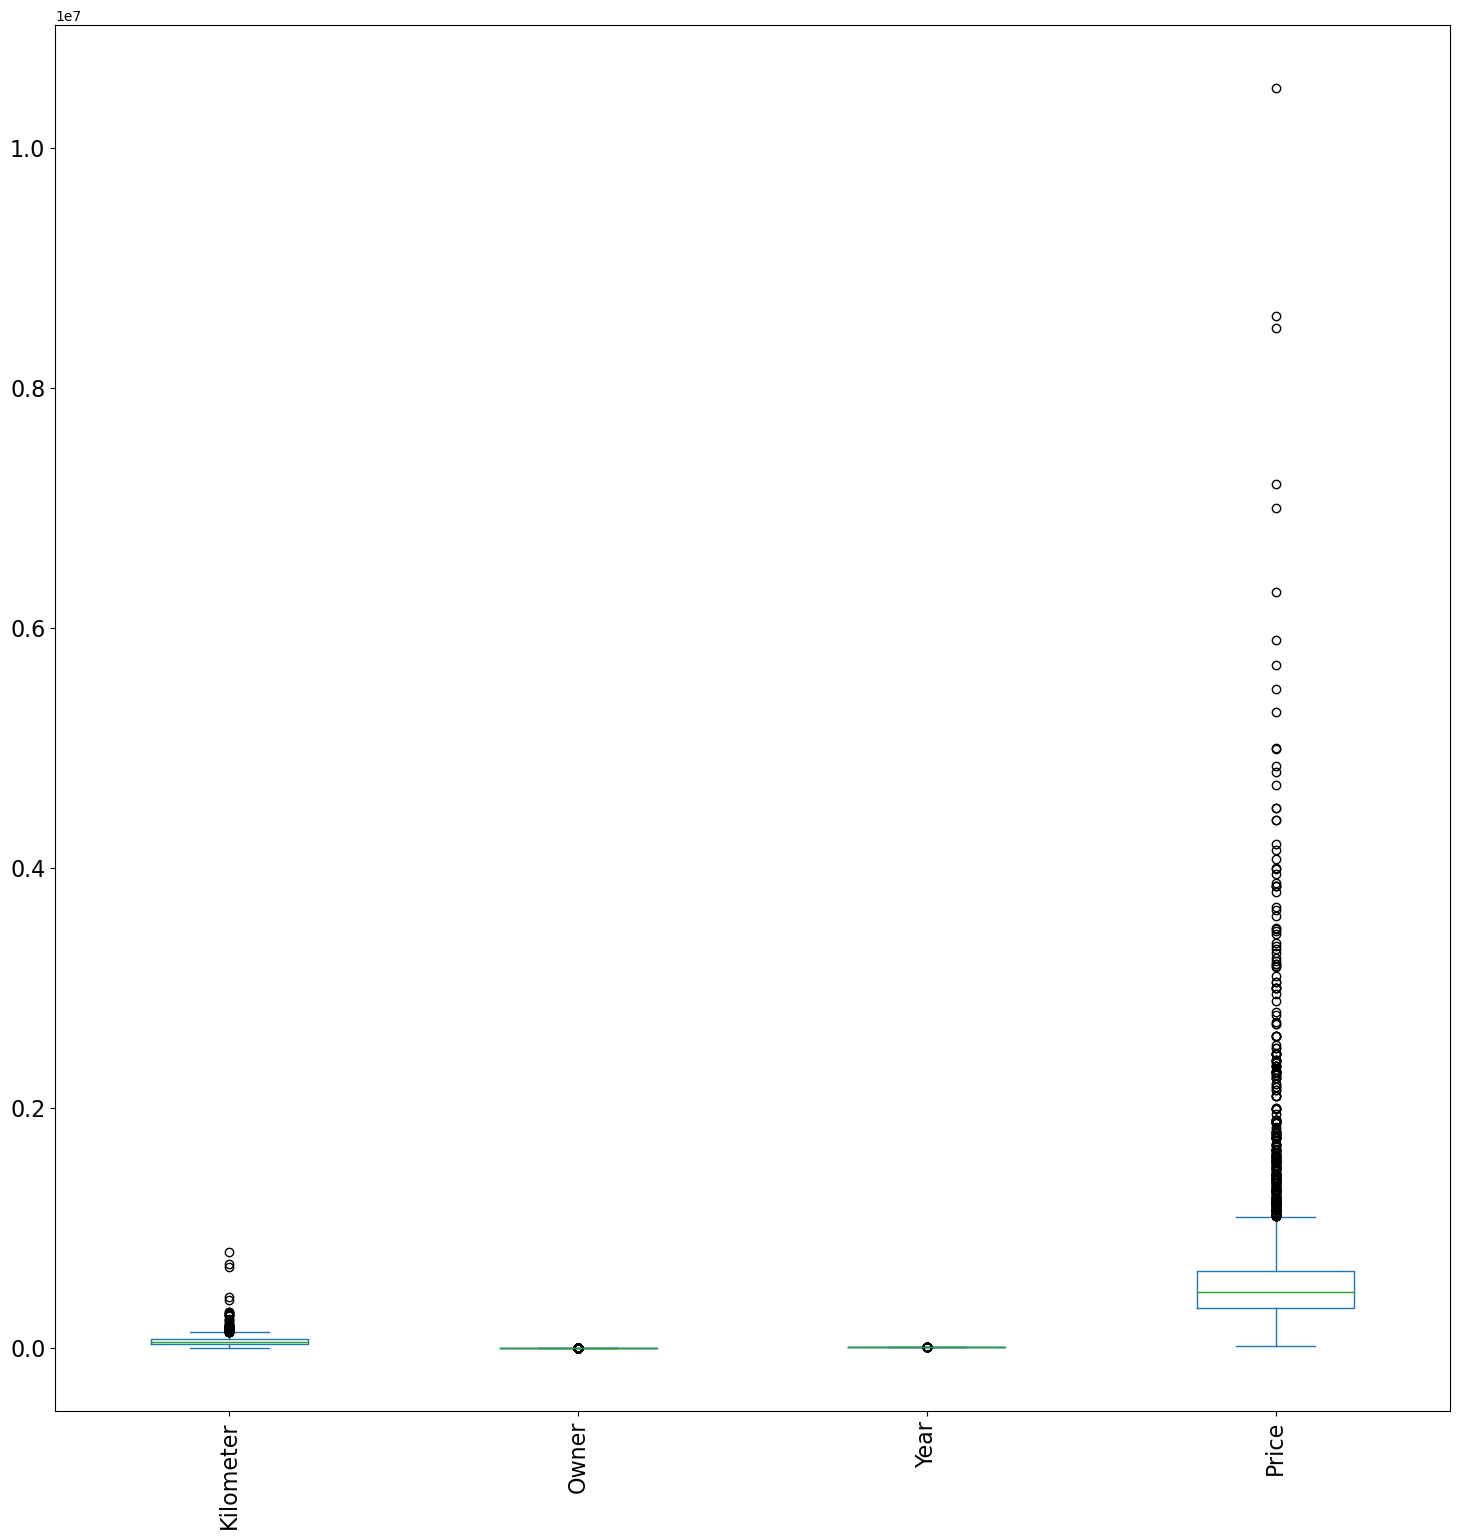

In [103]:
# Lets check and visualize presence of outliers using boxplot
df.plot(rot=90, kind='box',fontsize=16, figsize=(18,18))

* Here we can see presence of outliers in all the columns but since price is our target column we will not remove outliers from this column.

# Zscore Method:
    Lets remove outliers using Zsocre method.

In [104]:
features=df[['Kilometer','Owner','Year']]

In [106]:
# Lets import all required library
from scipy.stats import zscore
z=np.abs(zscore(features))
df1=df[(z<3).all(axis=1)]
df1

Brand ModelName                          Model    Variant  \
0      Hyundai    Santro                     Sportz CNG     Manual   
1      Hyundai     Elite                      Magna 1.2     Manual   
2       Toyota     Etios   2013-2014 G Xclusive Edition     Manual   
3      Hyundai       I10  1.1L iRDE ERA Special Edition     Manual   
4     Mahindra    Xuv500               2011-2015 W8 4WD     Manual   
...        ...       ...                            ...        ...   
4616    Maruti      Ritz                            LDi     Manual   
4617    Maruti  Alto 800                            LXI     Manual   
4618    Maruti     Swift                            VDI     Manual   
4619      Tata     Tiago                       XZA Plus  Automatic   
4620  Mahindra   Kuv 100            mFALCON G80 K6 Plus     Manual   

          Fuel type  Kilometer  Owner   Location  Year   Price  
0     CNG & HYBRIDS      62557      1      Delhi  2018  576800  
1            Petrol      52000      1      Delhi  2015  489999  
2            Petrol      33000      1      Delhi  2014  335000  
3     CNG & HYBRIDS      70000      2      Delhi  2009  115000  
4            Diesel      90000      2      Delhi  2011  500000  
...             ...        ...    ...        ...   ...     ...  
4616         Diesel      73911      2  Hyderabad  2016  286500  
4617         Petrol      19864      1  Hyderabad  2018  284500  
4618         Diesel      58569      1  Hyderabad  2012  359000  
4619         Petrol      15346      1  Hyderabad  2019  572500  
4620         Petrol      24505      1  Hyderabad  2017  438000  

[4477 rows x 10 columns]

In [107]:
# Lets check shape of new dataset
df1.shape

(4477, 10)

In [108]:
# Lets check the dataloss using zscore method
loss=(((df.shape[0]-df1.shape[0])/df.shape[0])*100)
loss

3.1162086128543605

* Here we can clearly see that we have lost just 3.11% data using zscore method which is well under limit of 10%

# Skewness:

In [109]:
# lets check the skewness in the dataset
df1.skew()

Kilometer    0.612943
Owner        1.656323
Year        -0.424664
Price        6.268847
dtype: float64

* Here we can see that skewness is present in 2 columns Kilometer and Owner.

In [110]:
# lets remove skewness using yeo-johnson method
feat=['Kilometer','Owner']

In [111]:
# importing required library for removing skewness using yeo-johnson
from sklearn.preprocessing import PowerTransformer
scaler= PowerTransformer(method='yeo-johnson')
'''
parameters:
method= 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod= 'box_cox' or 'yeo-johnson'\n"

In [112]:
df1[feat]=scaler.fit_transform(df1[feat].values)

In [113]:
# lets check the skewness again
df1[feat].skew()

Kilometer   -0.146244
Owner        1.656323
dtype: float64

* Here we have sucessfully removed skewness in column Kilometer. But we couldn't remove skewness from column Owner , may be because we have converted index names in column, it has only 5 values present which can be presumed as categorical, so, lets not remove the skewness from this column.

# Encoding:

In [114]:
# lets seperate categorical column in df1
category=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]=='object':
        category.append(i)
print(category)

['Brand', 'ModelName', 'Model', 'Variant', 'Fuel type', 'Location']


* Here we have the list of categorical columns available in new dataset

In [115]:
# lets convert dtype using LabelEncoder
# importing required library for label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1[category]=df1[category].apply(le.fit_transform)
df1[category].head()

Brand  ModelName  Model  Variant  Fuel type  Location
0      9        148    985        2          1         2
1      9         59    855        2          6         2
2     29         63    478        2          6         2
3      9         90     32        2          1         2
4     15        195    448        2          2         2

* Here we have successfully encoded the categorical columns in new dataset using LabelEncoder.

In [116]:
# lets check the correlation using heatmap
df1.corr()

Brand  ModelName     Model   Variant  Fuel type  Kilometer  \
Brand      1.000000   0.219730 -0.029189  0.001392  -0.108015  -0.010930   
ModelName  0.219730   1.000000  0.152116  0.066619  -0.133268   0.040759   
Model     -0.029189   0.152116  1.000000  0.040843   0.024050   0.005023   
Variant    0.001392   0.066619  0.040843  1.000000   0.034106   0.022703   
Fuel type -0.108015  -0.133268  0.024050  0.034106   1.000000  -0.226550   
Kilometer -0.010930   0.040759  0.005023  0.022703  -0.226550   1.000000   
Owner     -0.038157  -0.033558 -0.028912 -0.029351  -0.011404   0.057617   
Location  -0.014745  -0.001439  0.044223  0.023269   0.031949  -0.060980   
Year       0.082435  -0.004978  0.046116 -0.057613   0.064652  -0.285329   
Price     -0.001300  -0.032575 -0.029785 -0.363281  -0.213510  -0.053486   

              Owner  Location      Year     Price  
Brand     -0.038157 -0.014745  0.082435 -0.001300  
ModelName -0.033558 -0.001439 -0.004978 -0.032575  
Model     -0.028912  0.044223  0.046116 -0.029785  
Variant   -0.029351  0.023269 -0.057613 -0.363281  
Fuel type -0.011404  0.031949  0.064652 -0.213510  
Kilometer  0.057617 -0.060980 -0.285329 -0.053486  
Owner      1.000000 -0.072228 -0.262955 -0.062126  
Location  -0.072228  1.000000  0.086404 -0.060540  
Year      -0.262955  0.086404  1.000000  0.262249  
Price     -0.062126 -0.060540  0.262249  1.000000

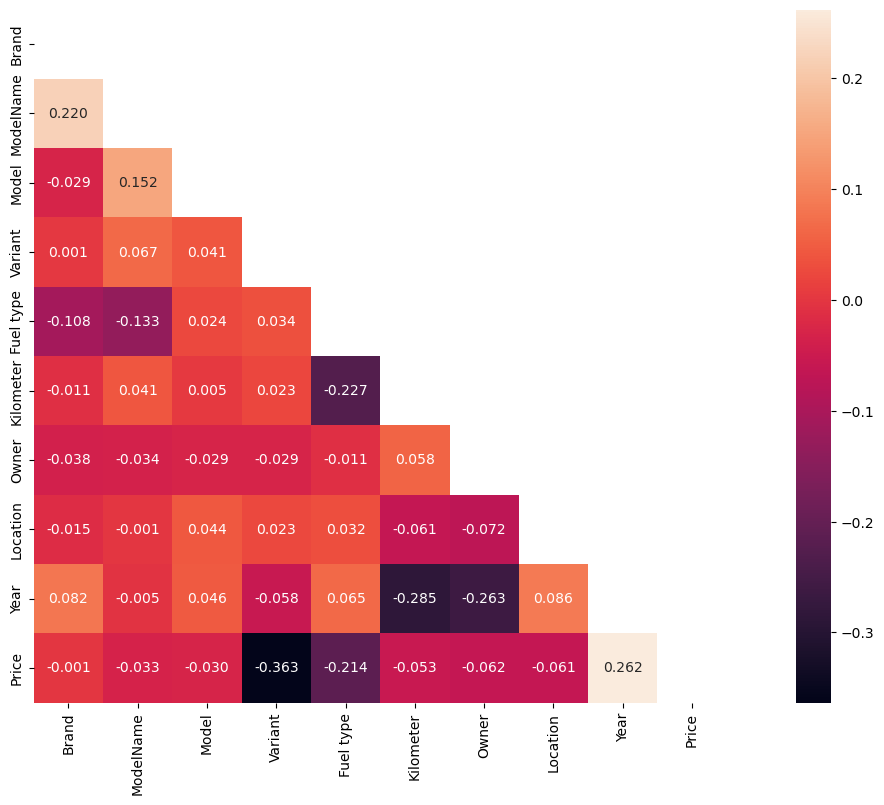

In [117]:
# lets Visualize the correlation by plotting heat map.
tri=np.triu(df1.corr())
plt.figure(figsize=(18,9))
sns.heatmap(df1.corr(), annot=True, square=True, fmt='0.3f', mask=tri)
plt.xticks(rotation=90)
plt.show()

* There is no multicolinearity present in the dataset.
* Here we can see that there is good relation between Brand and ModelName, ModelName and Model also shares fine relation. Price share negative strong relation with Variant and Fuel type, Fuel type also share strong negative relation with Kilometer, Year share strong negative relation with Kilometer and Owner.
* Price share strong positive relation with Year.

# Model Building:

In [118]:
# lets assign values to x and y for training and testing
x=df1.drop('Price',axis=1)
y=df1['Price']

* Here we have successfully separated the features and target columns in the new dataset.

# Best Random State:

In [119]:
# lets find best random state and Accuracy:
# importing all required libraries
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [121]:
max_acc=0
max_rs=0
for i in range(1,250):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    m=RandomForestRegressor()
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("Best Accuracy : ", max_acc," on Random_state : ",max_rs)

Best Accuracy :  0.8107784137074612  on Random_state :  204


* Here we are getting score of 81% on random state 204

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=204)

# Regression:

In [124]:
# Creating an Algorithm to predict scores of multiple models
# import all required libraries for model selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

model=[LinearRegression(),KNeighborsRegressor(),SVR(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),Lasso(),Ridge(),ElasticNet()]
for i in model:
    i.fit(x_train,y_train)
    pre=i.predict(x_test)
    print("Accuracy Score",i,"is", i.score(x_train,y_train))
    print("\nError")
    print("Mean Absolute Error", mean_absolute_error(y_test,pre))
    print("Root Mean Squared Error", (mean_squared_error(y_test,pre))**0.5)
    print("r2 Score ",r2_score(y_test,pre))
    
    print("------------------------------------------------------------------")
    print("\n\n")

Accuracy Score LinearRegression() is 0.23950464852959996

Error
Mean Absolute Error 232435.83371401366
Root Mean Squared Error 415930.7599330359
r2 Score  0.26457086245583505
------------------------------------------------------------------



Accuracy Score KNeighborsRegressor() is 0.6214654197996832

Error
Mean Absolute Error 151959.71235119045
Root Mean Squared Error 374582.0177073647
r2 Score  0.4035245098209287
------------------------------------------------------------------



Accuracy Score SVR() is -0.04521512311354736

Error
Mean Absolute Error 253311.86924396726
Root Mean Squared Error 497002.9007986715
r2 Score  -0.050066009064285044
------------------------------------------------------------------



Accuracy Score RandomForestRegressor() is 0.9493533787566784

Error
Mean Absolute Error 95184.81426339287
Root Mean Squared Error 211457.46959339522
r2 Score  0.8099163270243459
------------------------------------------------------------------



Accuracy Score AdaBoostReg

* Here we can see that we are getting best r2 score of 81% using Random Forest Regressor, which is better than all other models.

# Cross Validation of all models:

In [127]:
# importing libraries for cross validation
from sklearn.model_selection import cross_val_score
for j in model:
    cvs=cross_val_score(j,x_train,y_train,cv=5, scoring='r2')
    print("score of ",j,"is", cvs)
    print("Mean Score of",j,"is",cvs.mean(),"\nStandard Deviation is",cvs.std())
    print("-------------------------------------------------------------------")

score of  LinearRegression() is [0.23269677 0.18884152 0.28303509 0.24041309 0.26105501]
Mean Score of LinearRegression() is 0.24120829716839642 
Standard Deviation is 0.03149200122706496
-------------------------------------------------------------------
score of  KNeighborsRegressor() is [0.42219903 0.25086088 0.37928981 0.20733855 0.45925157]
Mean Score of KNeighborsRegressor() is 0.3437879701019929 
Standard Deviation is 0.09797387865236824
-------------------------------------------------------------------
score of  SVR() is [-0.04392307 -0.05330166 -0.05139915 -0.0380944  -0.04845983]
Mean Score of SVR() is -0.04703562083679733 
Standard Deviation is 0.0054765954873866405
-------------------------------------------------------------------
score of  RandomForestRegressor() is [0.57557599 0.45108609 0.67684784 0.5732559  0.76744266]
Mean Score of RandomForestRegressor() is 0.6088416964525625 
Standard Deviation is 0.10680720055908127
------------------------------------------------

* Based on R2score and Cross validation score, Gradient Boosting Regressor is having least difference, so, we will take Gradient Boosting regressor as our best model and will hypertune it for best performance.

# Hyper Parameter Tuning:

In [129]:
# lets import required library
from sklearn.model_selection import GridSearchCV

In [131]:
GBR=GradientBoostingRegressor()
parameter={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[204]}
search=GridSearchCV(GBR,parameter)
search.fit(x,y)                                                                                                                      

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 4],
                         'n_estimators': [500, 1000, 2000],
                         'random_state': [204], 'subsample': [0.5, 0.75, 1]})

In [132]:
print(search.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 2000, 'random_state': 204, 'subsample': 0.5}


In [134]:
GBR=GradientBoostingRegressor(n_estimators=2000 ,learning_rate=0.1 ,max_depth=4 ,subsample=0.5 ,random_state=204)
GBR.fit(x_train,y_train)
GBR.score(x_train,y_train)
pred=GBR.predict(x_test)
print("Accuracy Score: ", r2_score(y_test,pred))
print("Mean Absolute Error", mean_absolute_error(y_test,pred))
print("Root mean Squared Error", (mean_squared_error(y_test,pred))**0.5)

Accuracy Score:  0.7754114801136617
Mean Absolute Error 88205.08540260153
Root mean Squared Error 229849.94269147186


* Here finally we have got score of 77.54% which is fine, after hyper parameter tuning.

# Saving the Model:

In [135]:
#Saving the model
# importing library to save model
import pickle

Name="Car_Price_Prediction.pkl"
pickle.dump(GBR,open(Name,'wb'))

# Loading Model:

In [137]:
model=pickle.load(open(Name,'rb'))

In [142]:
prediction=model.predict(x_test)
prediction

array([725316.96451692, 294931.6774531 , 475772.79225242, ...,
       450542.81002319, 604985.29501049, 583109.28988626])

In [143]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["predicted","actual"])

0              1              2              3     \
predicted  725316.964517  294931.677453  475772.792252  437166.916968   
actual     633000.000000  220000.000000  508000.000000  320000.000000   

                    4             5              6              7     \
predicted  994988.092436  8.401096e+05  439772.300592  363088.433183   
actual     994000.000000  1.149000e+06  384000.000000  362500.000000   

                   8              9     ...           1334           1335  \
predicted  1.617583e+06  168173.085774  ...  878810.735218  300953.522025   
actual     1.450000e+06  175000.000000  ...  925000.000000  490000.000000   

                    1336           1337           1338          1339  \
predicted  597377.902597  292602.810407  436433.938099  345456.38831   
actual     580000.000000  328000.000000  434000.000000  300500.00000   

                    1340           1341          1342           1343  
predicted  860179.756951  450542.810023  604985.29501  583109.289886  
actual     950000.000000  455000.000000  620000.00000  577000.000000  

[2 rows x 1344 columns]

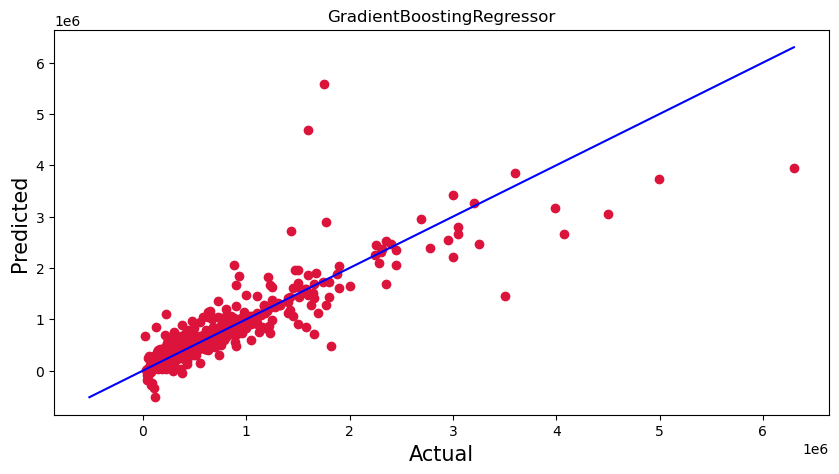

In [144]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("GradientBoostingRegressor")
plt.show()

* Here in the picture we can see Actual vs Predicted, Blue line refers to Actual Values and red dots are Predicted Values.

# Conclusion:
    
    * In this project report, we used Machine learning algorithms to predict the used car price.                                  
    * We used proper procedure to analyze the dataset and finding the correlation between the features.                                     
    * Here we selected the Features which are correlated to each other and are independent in nature.                                
    * Visualization helped us in understanding the data by graphical representation to make things easy for us to understand what data is trying to say.                                                       
    * As Data cleaning is one of the most important step to remove unrequired data which was not required for our model building and prediction.                                                     
    * Then we removed outliers and skewness from the dataset to prepare our model for training and testing purpose.               
    * After prepairing our model we separated feature and target columns for training and testing purposes.                        
    * We deployed multiple models to find the best model.          
    * We got GradientBoostingRegressor as our best model based on r2_score and cross vaildation score.                               
    * Then we did hyper parameter tuning of our best model for best possible results.                                                  
    * Finally we saved the final model and predicted the label.       
    * To, conclude, The CAR PRICE PREDICTION PROJECT, We hope this study will move a small step ahead in provifing some methodological contribution.                                                        
    * Finally Thank You very much for giving me oppurtunity to scrap data first, then saving it in excel format and importing it to jupyter notebook and applying machine learning algorithms to pick the best model, this was my first time doing all the steps from scrapping to building machine leaning model. will definately perform better from next time onwards.                                             

# Project Complete :

# Thank You So Much for taking out your precious time to read this!!!!!!!!!